In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#GETTING DATA FROM THE FINANCIAL DATA CSV
# "BigPositionVsValue.csv" -> pandas
financial_data = pd.read_csv("BigPositionVsValue.csv")
#https://colab.research.google.com/drive/1ByG2ehMMs4SxlL0AMdKV0ojXxTDG6RMs?usp=sharing#scrollTo=iJVgp8WCpHK_

#GETTING DATA FROM THE MATCH DATA CSV
# "MatchData.csv" -> pandas
match_data = pd.read_csv("MatchData.csv")


my_final_data = pd.read_csv("Final_Data.csv")

In [74]:
financial_data

Year               Team  ...  Average_Market_Value  Total_Market_Value
0    2017    manchester city  ...                 31.53             1010.00
1    2017         chelsea fc  ...                 19.22              884.25
2    2017       liverpool fc  ...                 24.50              857.50
3    2017  manchester united  ...                 24.27              849.50
4    2017  tottenham hotspur  ...                 24.40              829.60
..    ...                ...  ...                   ...                 ...
115  2022       brentford fc  ...                 10.31              371.20
116  2022       leeds united  ...                  7.34              345.15
117  2022     crystal palace  ...                  8.28              323.05
118  2022          fulham fc  ...                  6.28              295.25
119  2022    afc bournemouth  ...                  6.11              287.20

[120 rows x 10 columns]

The following segment of code represents the normalization of total market_value. Total_market value represents the sum of each individual market value in the team. Normalization was completed to offset limiting/realistic factors such as: inflation.

In [75]:
relativeValue = []

#Loop through each row
for index, team in financial_data.iterrows():
    
    #Obtain which season we are looking at
    season = team['Year']
    
    #Create a new dataframe with just this season
    teamseason = financial_data[financial_data['Year'] == season]
    
    #Find the max value
    maxvalue = teamseason['Total_Market_Value'].max()
    
    #Divide this row's value by the max value for the season
    tempRelativeValue = team['Total_Market_Value']/maxvalue
    
    #Append it to our list
    relativeValue.append(tempRelativeValue)

#Add list to new column in main dataframe
financial_data["Normalized_Market_Value"] = relativeValue

#view the new table
financial_data

Year               Team  ...  Total_Market_Value  Normalized_Market_Value
0    2017    manchester city  ...             1010.00                 1.000000
1    2017         chelsea fc  ...              884.25                 0.875495
2    2017       liverpool fc  ...              857.50                 0.849010
3    2017  manchester united  ...              849.50                 0.841089
4    2017  tottenham hotspur  ...              829.60                 0.821386
..    ...                ...  ...                 ...                      ...
115  2022       brentford fc  ...              371.20                 0.322783
116  2022       leeds united  ...              345.15                 0.300130
117  2022     crystal palace  ...              323.05                 0.280913
118  2022          fulham fc  ...              295.25                 0.256739
119  2022    afc bournemouth  ...              287.20                 0.249739

[120 rows x 11 columns]

In [76]:
match_data

Year  Position            Squad  MP   W  ...  Pts/MP    xG   xGA   xGD  xGD/90
0      22         1  Manchester City  38  28  ...    2.34  78.6  32.1  46.5    1.22
1      22         2          Arsenal  38  26  ...    2.21  71.9  42.0  29.9    0.79
2      22         3   Manchester Utd  38  23  ...    1.97  67.7  50.4  17.3    0.45
3      22         4    Newcastle Utd  38  19  ...    1.87  72.0  39.6  32.4    0.85
4      22         5        Liverpool  38  19  ...    1.76  72.6  50.9  21.7    0.57
..    ...       ...              ...  ..  ..  ...     ...   ...   ...   ...     ...
115    17        16     Huddersfield  38   9  ...    0.97  31.3  48.5 -17.2   -0.45
116    17        17      Southampton  38   7  ...    0.95  39.9  45.2  -5.3   -0.14
117    17        18     Swansea City  38   8  ...    0.87  31.6  58.6 -27.0   -0.71
118    17        19       Stoke City  38   7  ...    0.87  36.5  62.5 -26.0   -0.69
119    17        20        West Brom  38   6  ...    0.82  36.5  47.9 -11.4   -0.30

[120 rows x 16 columns]

As it can be seen in the below scatter plot, the trend that the plot contains justifies the reason for the group to choose expected goals difference as their independent variable for the match data. It can be seen that the coefficient of determination(R squared) is EXTREMELY close to 1, and the points are very close to the line of best fit. From the surface level, this trend makes sense, as the expected goal difference represents how well the team can simaltanouesly score goals AND prevent goals scored by the other team, which represents a highly consistent team. Thus this trend reinforces general patterns AND, shows perfectly why this is the deciding factor that the group chose from match_data. 

Although the plot itself represents a very strong, consistent trend of xgd, there are some aspects that it does not capture. For example, own goals in soccer are NOT considered in the xgd(and not xg or xga), as xgd depends on other factors(https://www.skysports.com/football/news/11095/12829539/expected-goals-expected-assists-pressures-carries-high-turnovers-and-more-advanced-stats-explained).
This may slightly fluctuate the actual score during a game, compared to the predicted, which this model does not account for. Regardless, own goals do not occurr as often as one would think, thus the limitation can safely be ignored. Besides own goals, there are no other major limitations that xgd faces, when predicting the score of future matches.

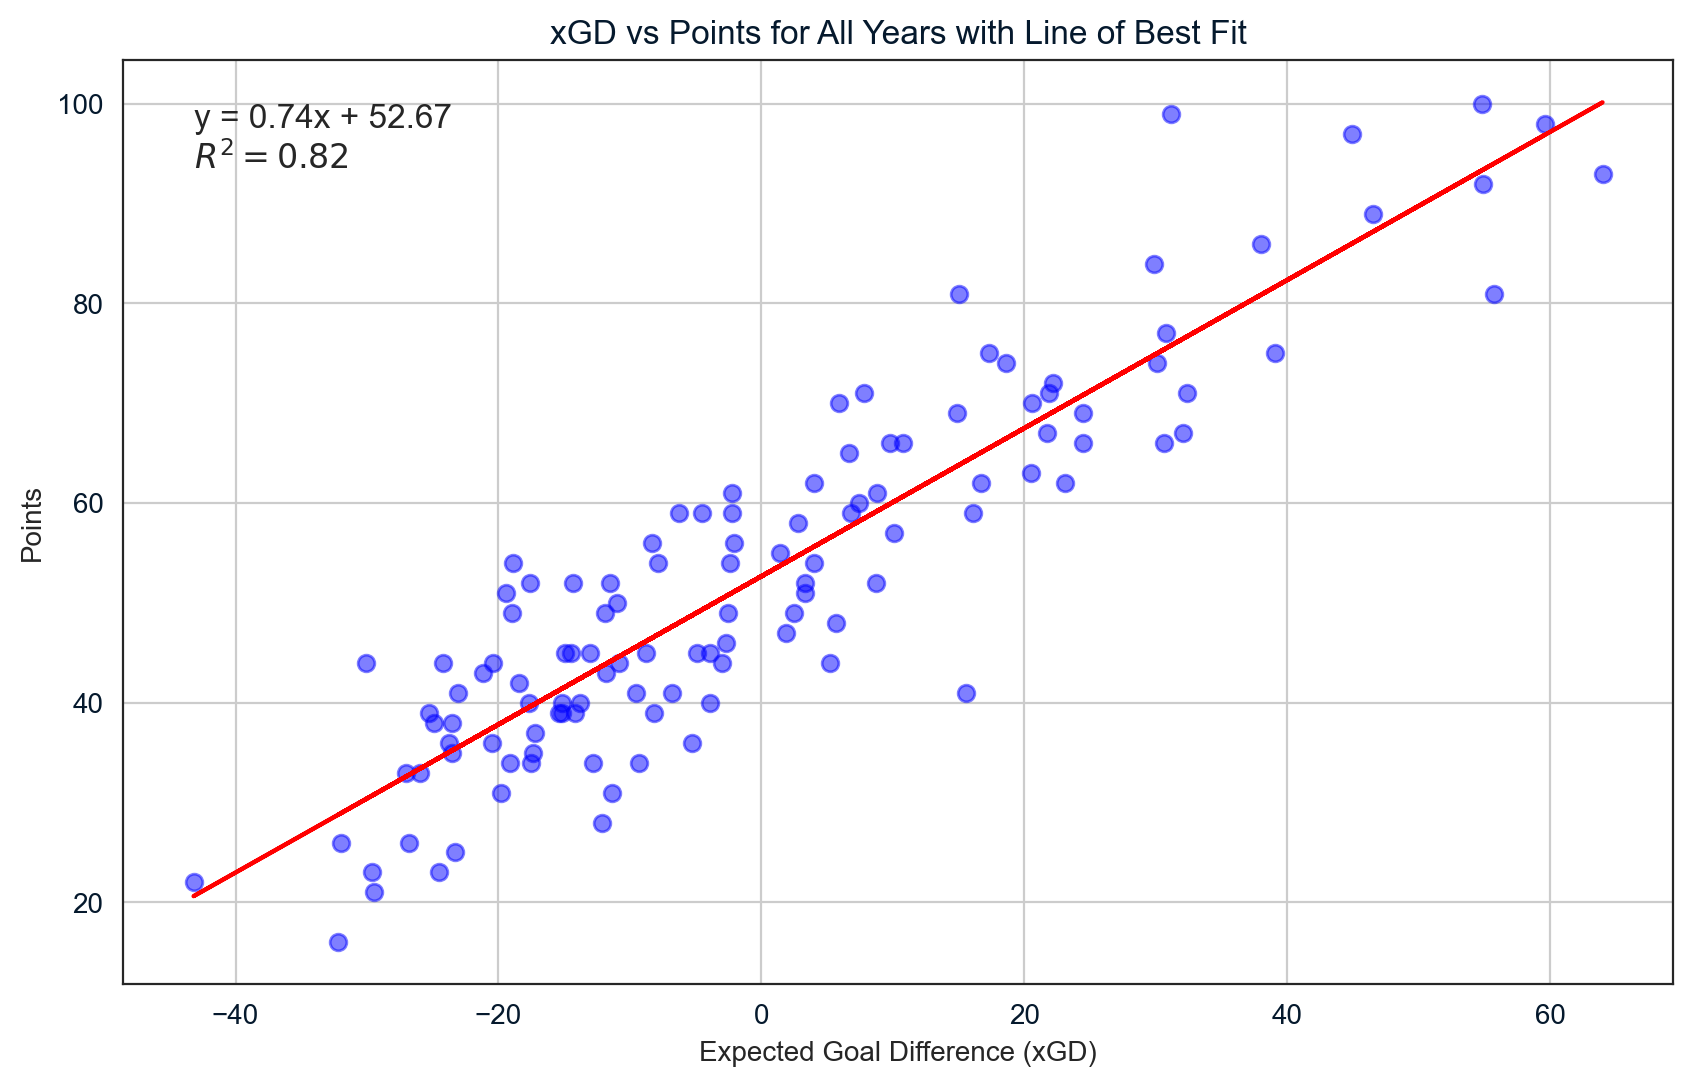

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
#print(len(match_data))  # Corrected 'PRINT' to 'print'
# Plotting xGD vs Points for match_data for all years
plt.figure(figsize=(10, 6))
plt.scatter(match_data['xGD'], match_data['Pts'], color='blue', alpha=0.5)

# Calculating and plotting the line of best fit
m, b = np.polyfit(match_data['xGD'], match_data['Pts'], 1)
predicted_pts = m*match_data['xGD'] + b
plt.plot(match_data['xGD'], predicted_pts, color='red')

# Calculating R^2 value
r_squared = r2_score(match_data['Pts'], predicted_pts)

plt.title('xGD vs Points for All Years with Line of Best Fit')
plt.xlabel('Expected Goal Difference (xGD)')
plt.ylabel('Points')
plt.grid(True)

# Displaying the equation of the line of best fit and R^2 on the graph
equation = f"y = {m:.2f}x + {b:.2f}"
plt.text(min(match_data['xGD']), max(match_data['Pts']), f'{equation}\n$R^2 = {r_squared:.2f}$', fontsize=12, verticalalignment='top')

plt.show()

The following bar graph shows a distinguishing, yet sensible pattern in the context of this data and this project. Similar to the above line graph, the overall trend that can be seen is that as position decreases(gets larger, f.e. 19->20), xgd generally decreases. Though at the same time, there is a reason why as to why the group decided to not go with position as the output. 
First, it can be said that the R^2 is slightly lower of this plot compared to the above one. Although it is a very small difference, it is an important difference to consider, as the statistical portion of this project heavily relies on correct/accurate data. 
Second, it is important to consider that xgd is not the ONLY independent variable being considered for this assignment. As seen in some of the plots below, and in the defining question, financial data(normalized market value) is another independent variable used in determining the output. For normalized market value vs position, it can be seen that the R^2 is even lower(0.66), thus this explains as to why position is NOT the determining output for this project.
Third, 
As it can be seen with the inconsisent strength of correlation between both inputs, and the slightly too low R^2 value, these aspects best explain as to why position is not the determining output for this project.

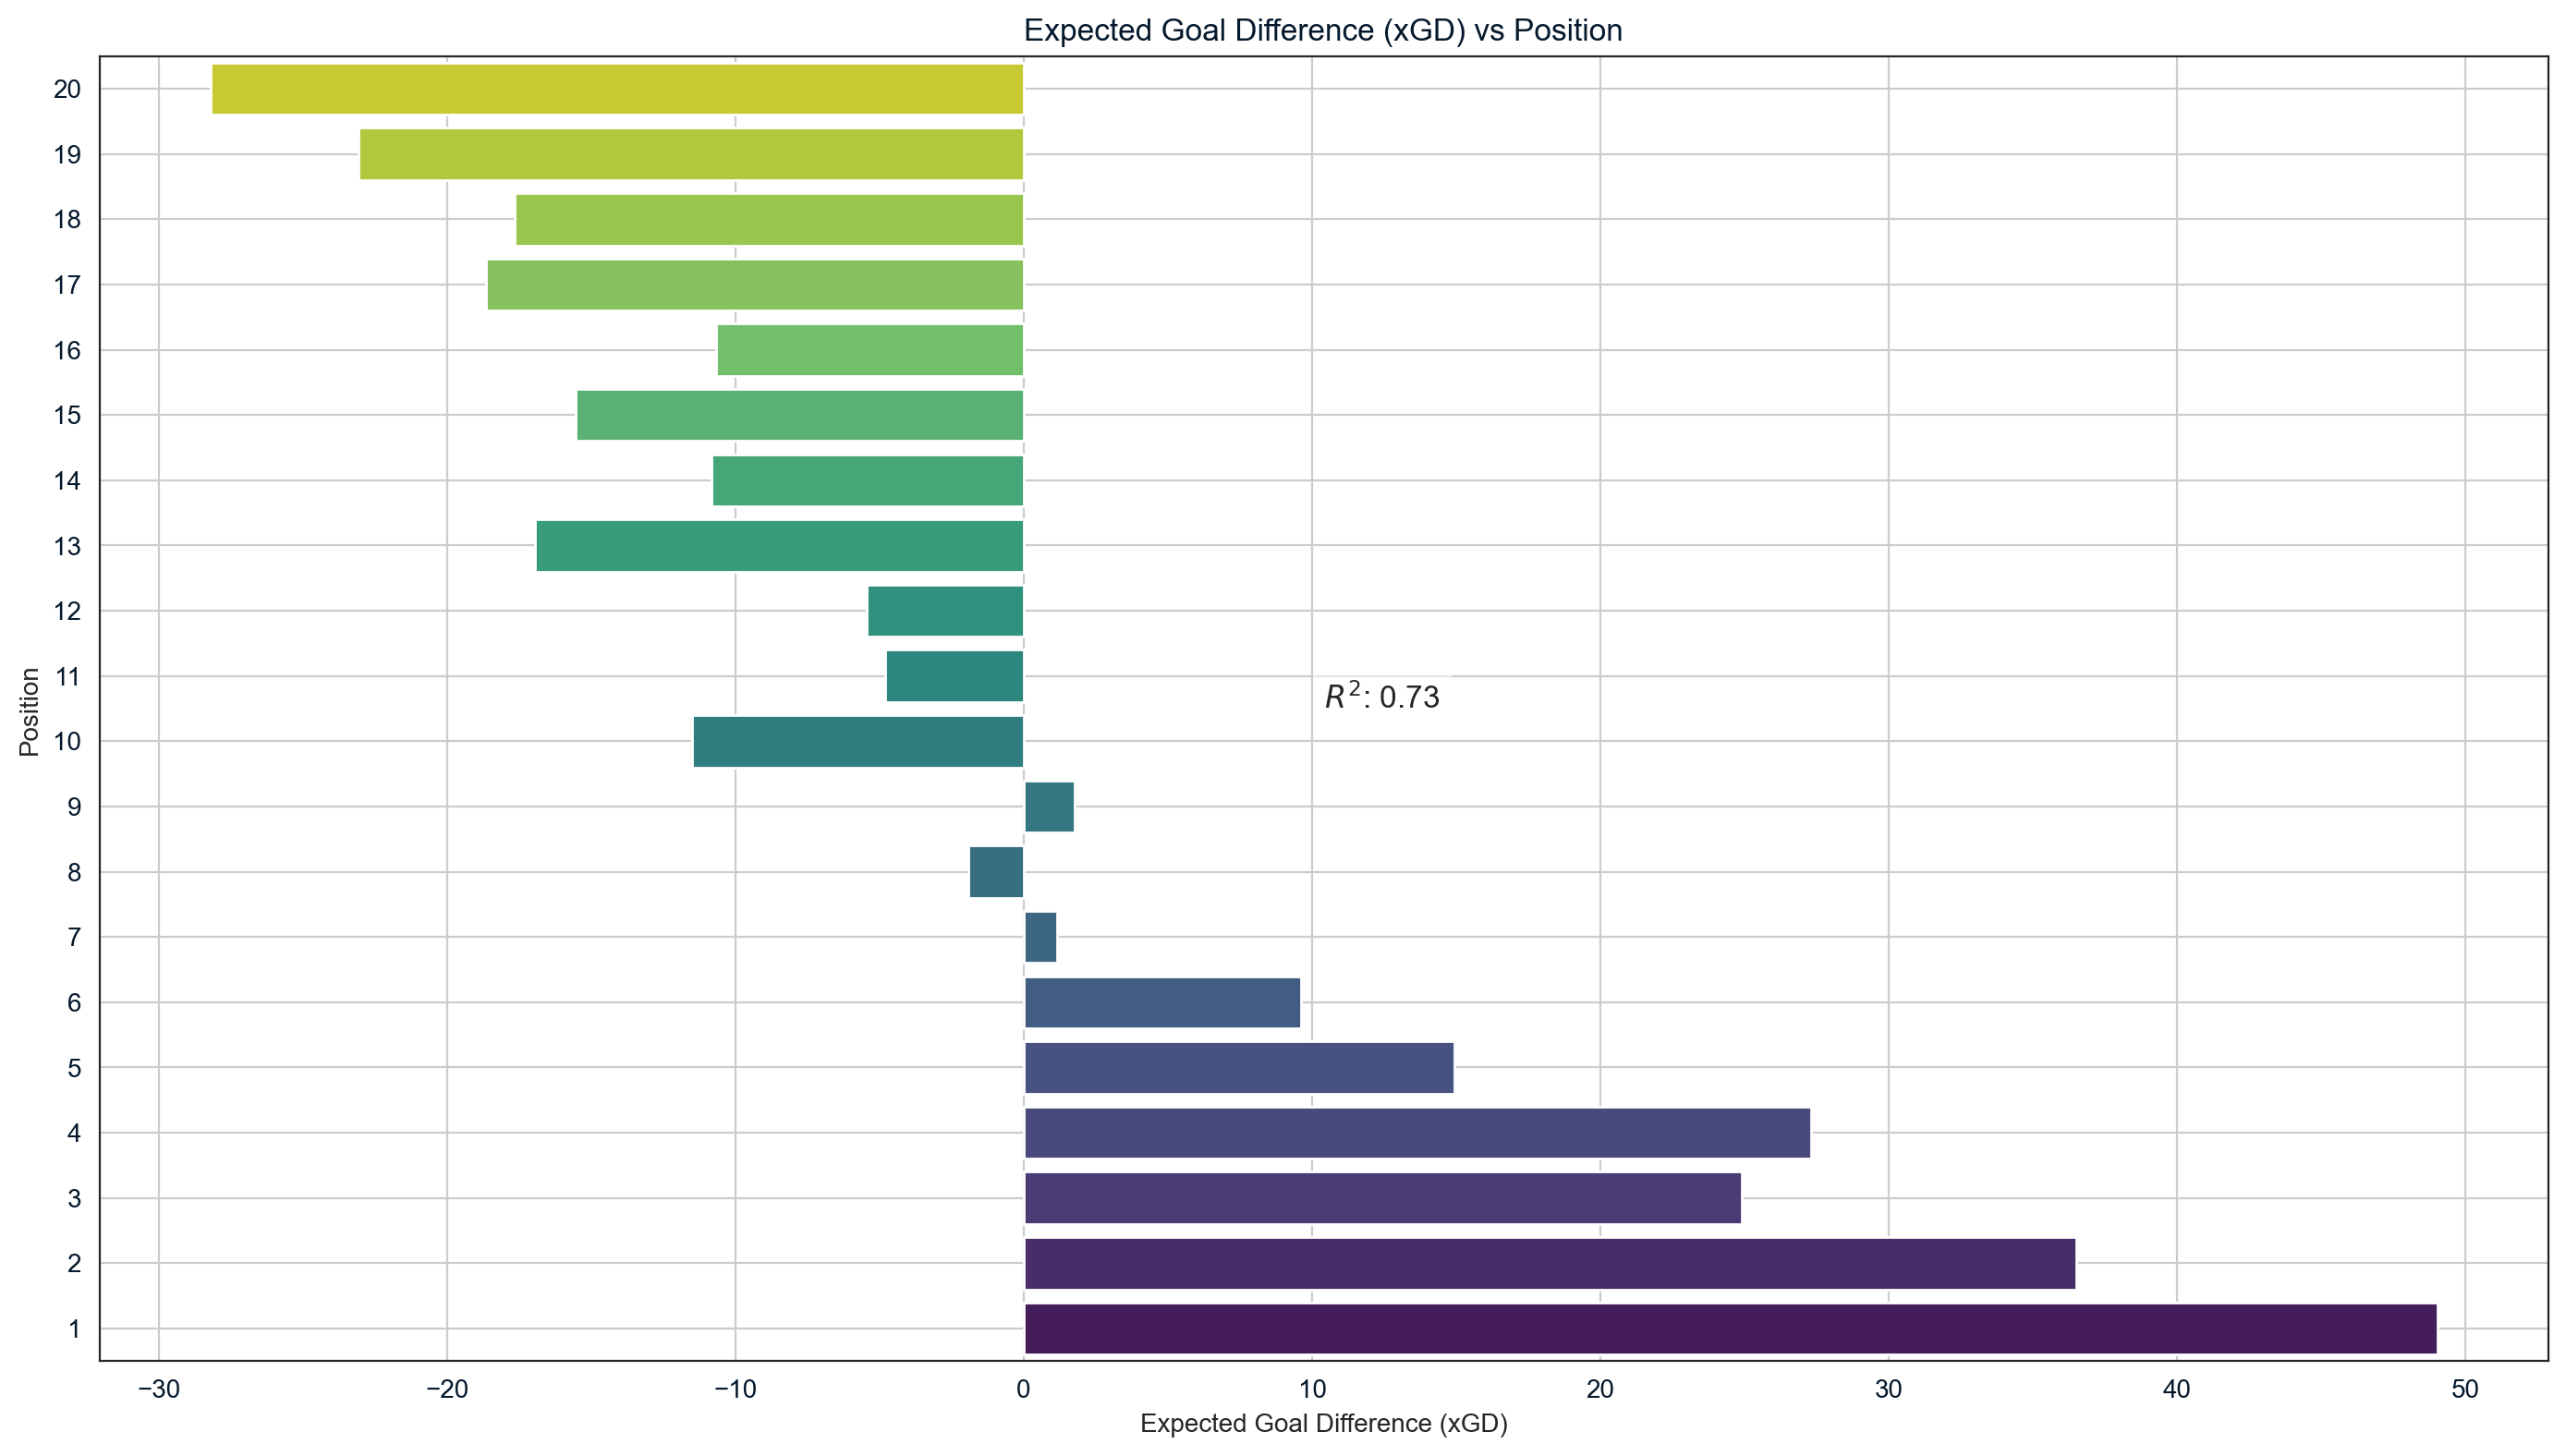

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Creating a bar plot of xGD vs Position
plt.figure(figsize=(14, 8))
sns.barplot(data=match_data, y='Position', x='xGD', palette='viridis', ci=None, orient='h')

plt.title('Expected Goal Difference (xGD) vs Position')
plt.ylabel('Position')
plt.xlabel('Expected Goal Difference (xGD)')
plt.gca().invert_yaxis()  # Inverting y-axis to show the highest position (1) at the top
plt.grid(True)

# Calculating R^2 value using Pearson correlation for xGD and Position
pearson_corr, _ = stats.pearsonr(match_data['xGD'], match_data['Position'])
r_squared = pearson_corr**2

# Displaying the R^2 on the graph
plt.text(0.5, 0.5, f'$R^2$: {r_squared:.2f}', 
         fontsize=12, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

The following scatter plot represents, and shows in depth another tested pattern: that of xG vs points. 
Although xg has a very high R^2 (in terms of the below plot), it is still slightly lower than that of xgd. 
Not only that, but it is important to consider that from a correlation perspective, xg does not predict draws/ties that reasonably well. For example, although in the 2nd plot below, the R^2 for draws is better than xgd, it is important to consider the values that are taken on. For xg, much of the values for which draws occur are EXTREMELY HIGH(usually at least an XG value of 30 is where most draws occur) For xGD, most values for which draws occur at a much closer to range to 0. From a sports analytics perspective, this makes sense, as ties/draws are a sign that not that many goals are allowed in, and not that many goals go in for the home team. This is a VERY important factor to consider, as it demonstrates from the general sense of this model, xg can not be used(as it has very unreasonably high values for draws, and draws are a REQUIRED part of determining points, and points is the output). 

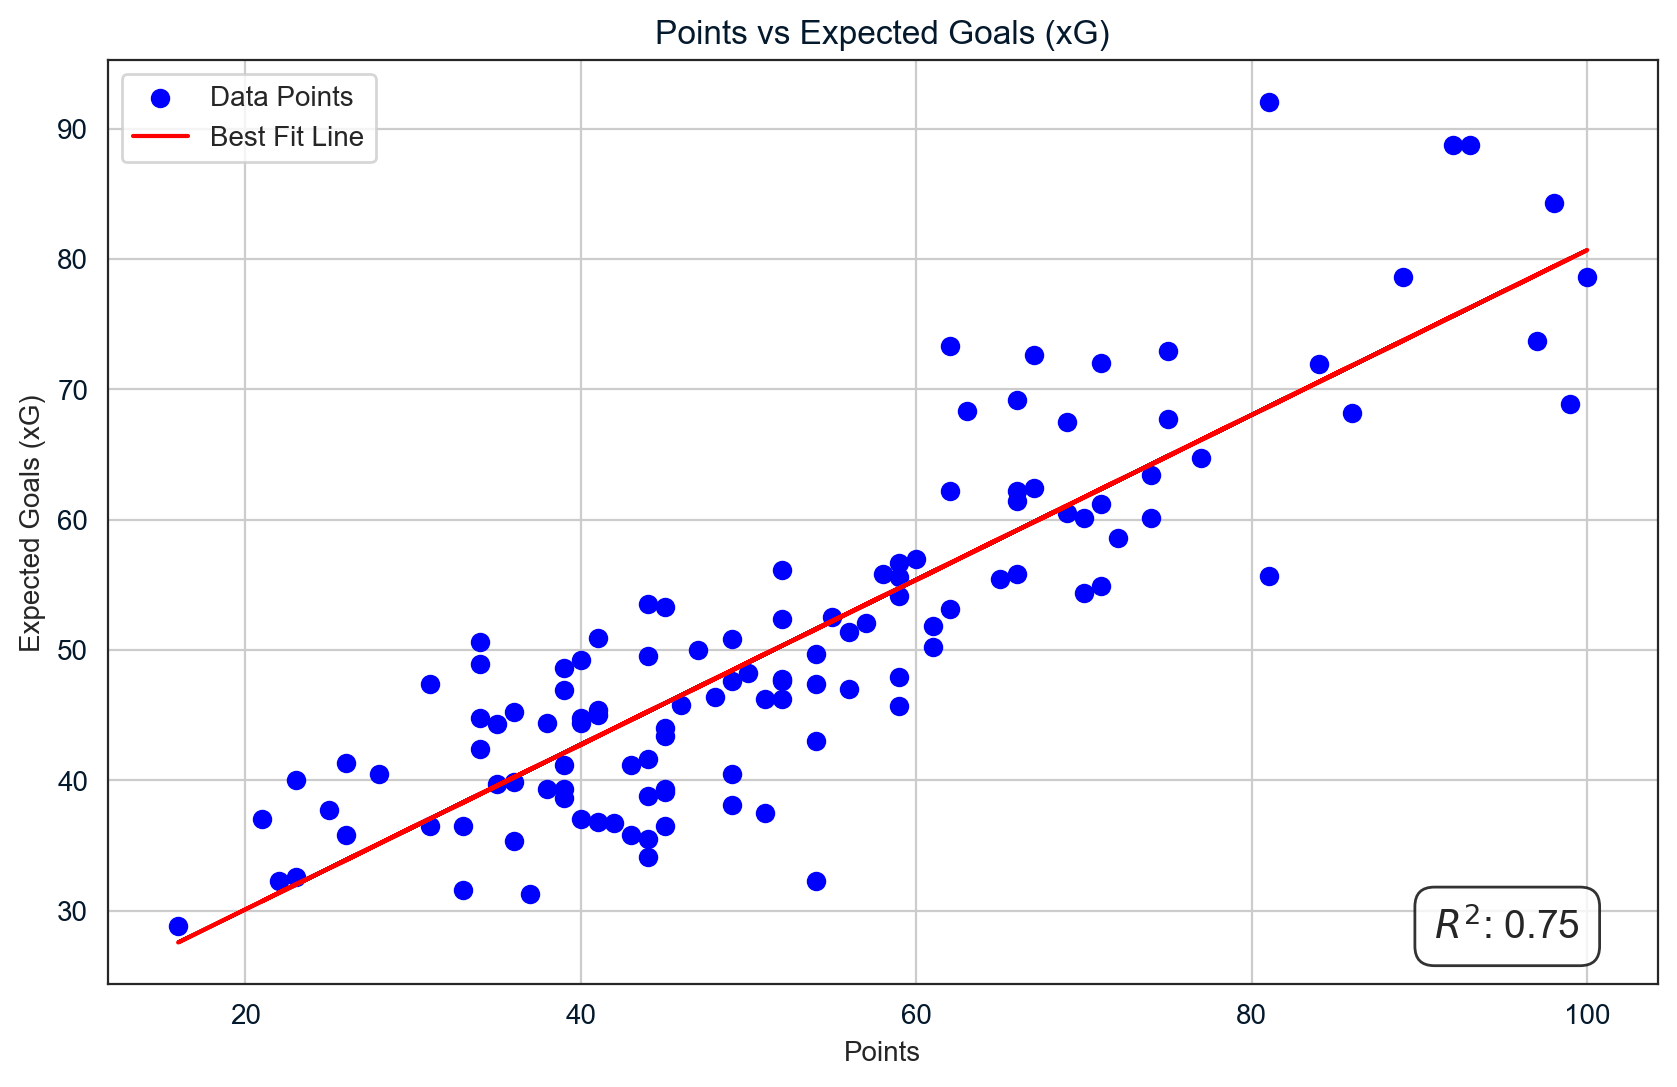

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming match_data is already defined and contains 'xG' and 'Pts' columns as per the previous cells.

# Calculating Pearson correlation coefficient and R^2 value between xG and Points
pearson_corr_coefficient, _ = stats.pearsonr(match_data['xG'], match_data['Pts'])
r_squared = pearson_corr_coefficient**2

# Plotting the relationship between Points and Expected Goals (xG) with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(match_data['Pts'], match_data['xG'], color='blue', label='Data Points')
m, b = np.polyfit(match_data['Pts'], match_data['xG'], 1)
plt.plot(match_data['Pts'], m*match_data['Pts'] + b, color='red', label='Best Fit Line')

plt.title('Points vs Expected Goals (xG)')
plt.xlabel('Points')
plt.ylabel('Expected Goals (xG)')
plt.legend()
plt.grid(True)

# Displaying R^2 on the graph, making it more visible and placing it on the bottom right
plt.text(0.95, 0.05, f'$R^2$: {r_squared:.2f}', 
         fontsize=14, transform=plt.gca().transAxes, 
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

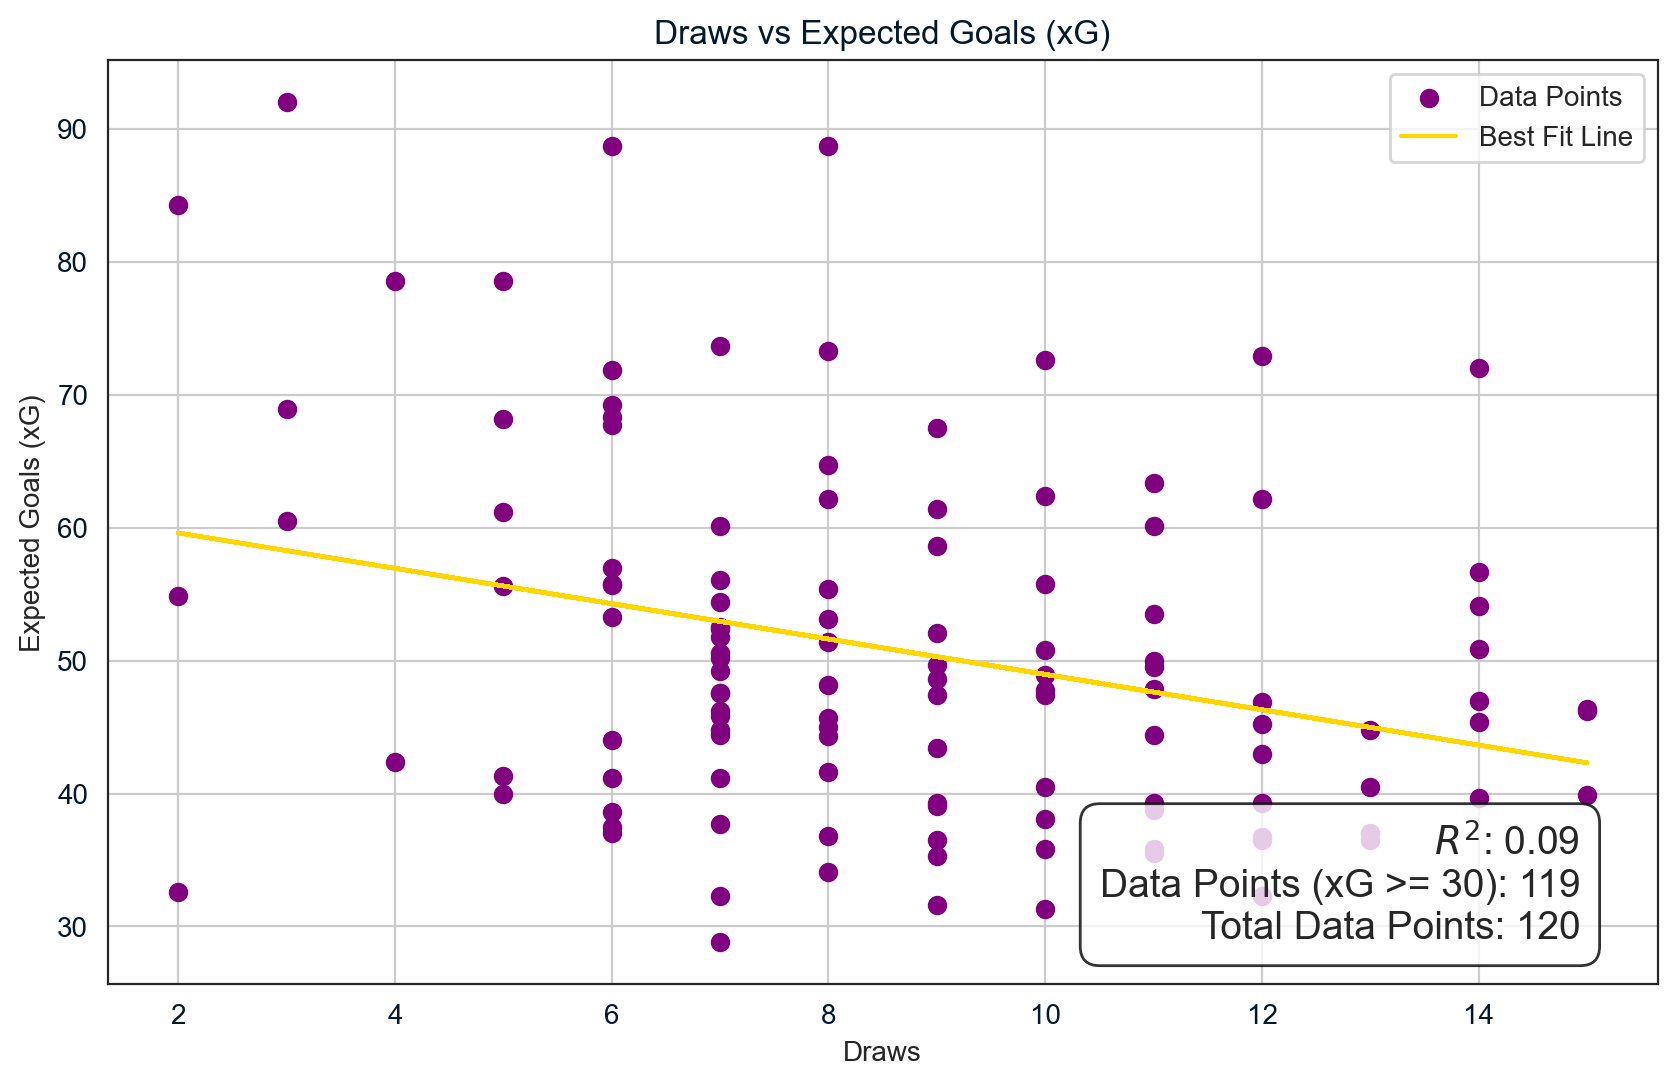

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Filtering data points where xG is greater than or equal to 30
filtered_data_xg_30 = match_data[match_data['xG'] >= 30]

# Counting the number of data points in the filtered dataset for xG >= 30
num_data_points_xg_30 = len(filtered_data_xg_30)

# Total number of data points in match_data
total_data_points = len(match_data)

# Calculating Pearson correlation coefficient and R^2 value between xG and Draws
pearson_corr_coefficient_xg_draws, _ = stats.pearsonr(match_data['xG'], match_data['D'])
r_squared_xg_draws = pearson_corr_coefficient_xg_draws**2

# Plotting the relationship between Draws and Expected Goals (xG) with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(match_data['D'], match_data['xG'], color='purple', label='Data Points')
m_xg_draws, b_xg_draws = np.polyfit(match_data['D'], match_data['xG'], 1)
plt.plot(match_data['D'], m_xg_draws*match_data['D'] + b_xg_draws, color='gold', label='Best Fit Line')

plt.title('Draws vs Expected Goals (xG)')
plt.xlabel('Draws')
plt.ylabel('Expected Goals (xG)')
plt.legend()
plt.grid(True)

# Displaying R^2, the number of data points with xG >= 30, and total data points on the graph
plt.text(0.95, 0.05, f'$R^2$: {r_squared_xg_draws:.2f}\nData Points (xG >= 30): {num_data_points_xg_30}\nTotal Data Points: {total_data_points}', 
         fontsize=14, transform=plt.gca().transAxes, 
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

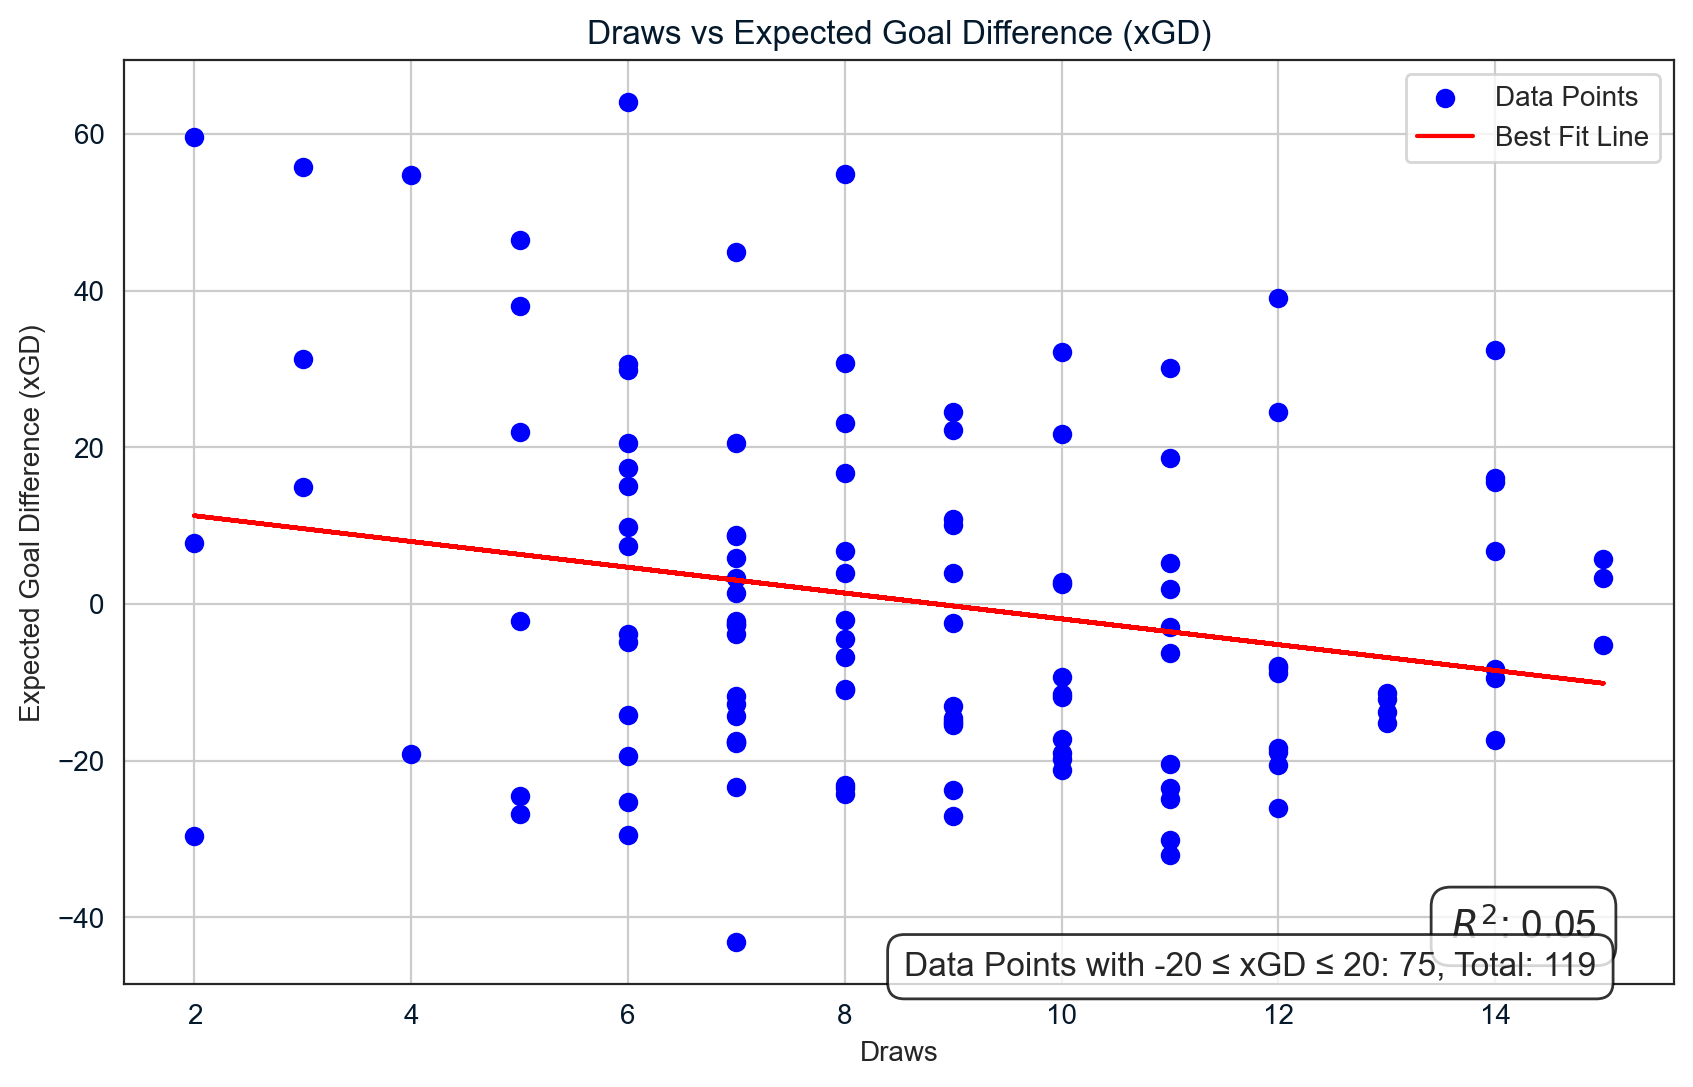

In [81]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming 'filtered_data_xg_30' is the DataFrame to be used based on the provided variables
# Calculating Pearson correlation coefficient and R^2 value between xGD and Draws
pearson_corr_coefficient_xgd_draws, _ = stats.pearsonr(filtered_data_xg_30['xGD'], filtered_data_xg_30['D'])
r_squared_xgd_draws = pearson_corr_coefficient_xgd_draws**2

# Plotting the relationship between Draws and Expected Goal Difference (xGD) with the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_xg_30['D'], filtered_data_xg_30['xGD'], color='blue', label='Data Points')
m_xgd_draws, b_xgd_draws = np.polyfit(filtered_data_xg_30['D'], filtered_data_xg_30['xGD'], 1)
plt.plot(filtered_data_xg_30['D'], m_xgd_draws*filtered_data_xg_30['D'] + b_xgd_draws, color='red', label='Best Fit Line')

plt.title('Draws vs Expected Goal Difference (xGD)')
plt.xlabel('Draws')
plt.ylabel('Expected Goal Difference (xGD)')
plt.legend()
plt.grid(True)

# Displaying R^2 on the graph, making it more visible and placing it on the bottom right
plt.text(0.95, 0.05, f'$R^2$: {r_squared_xgd_draws:.2f}', 
         fontsize=14, transform=plt.gca().transAxes, 
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

# Counting data points where xGD is >= -20 and <= 20
data_points_in_range = filtered_data_xg_30[(filtered_data_xg_30['xGD'] >= -20) & (filtered_data_xg_30['xGD'] <= 20)]
number_of_data_points_in_range = len(data_points_in_range)

# Counting total number of data points
total_data_points = len(filtered_data_xg_30)

# Listing the number of data points with -20 ≤ xGD ≤ 20 and total data points on the plot
plt.figtext(0.95, 0.01, f'Data Points with -20 ≤ xGD ≤ 20: {number_of_data_points_in_range}, Total: {total_data_points}', 
            fontsize=12, transform=plt.gca().transAxes, 
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

The following is a common data visualization technique in which we explore all the features that relate to one another. In context of match_data, this would be values that represent score(aka, gf, ga, gd, xf, xa, and of course, xgd). Wins minus losses are included as well, to offer another differential for comparison(as differentials are important to compare, as the main differential is xgd). 

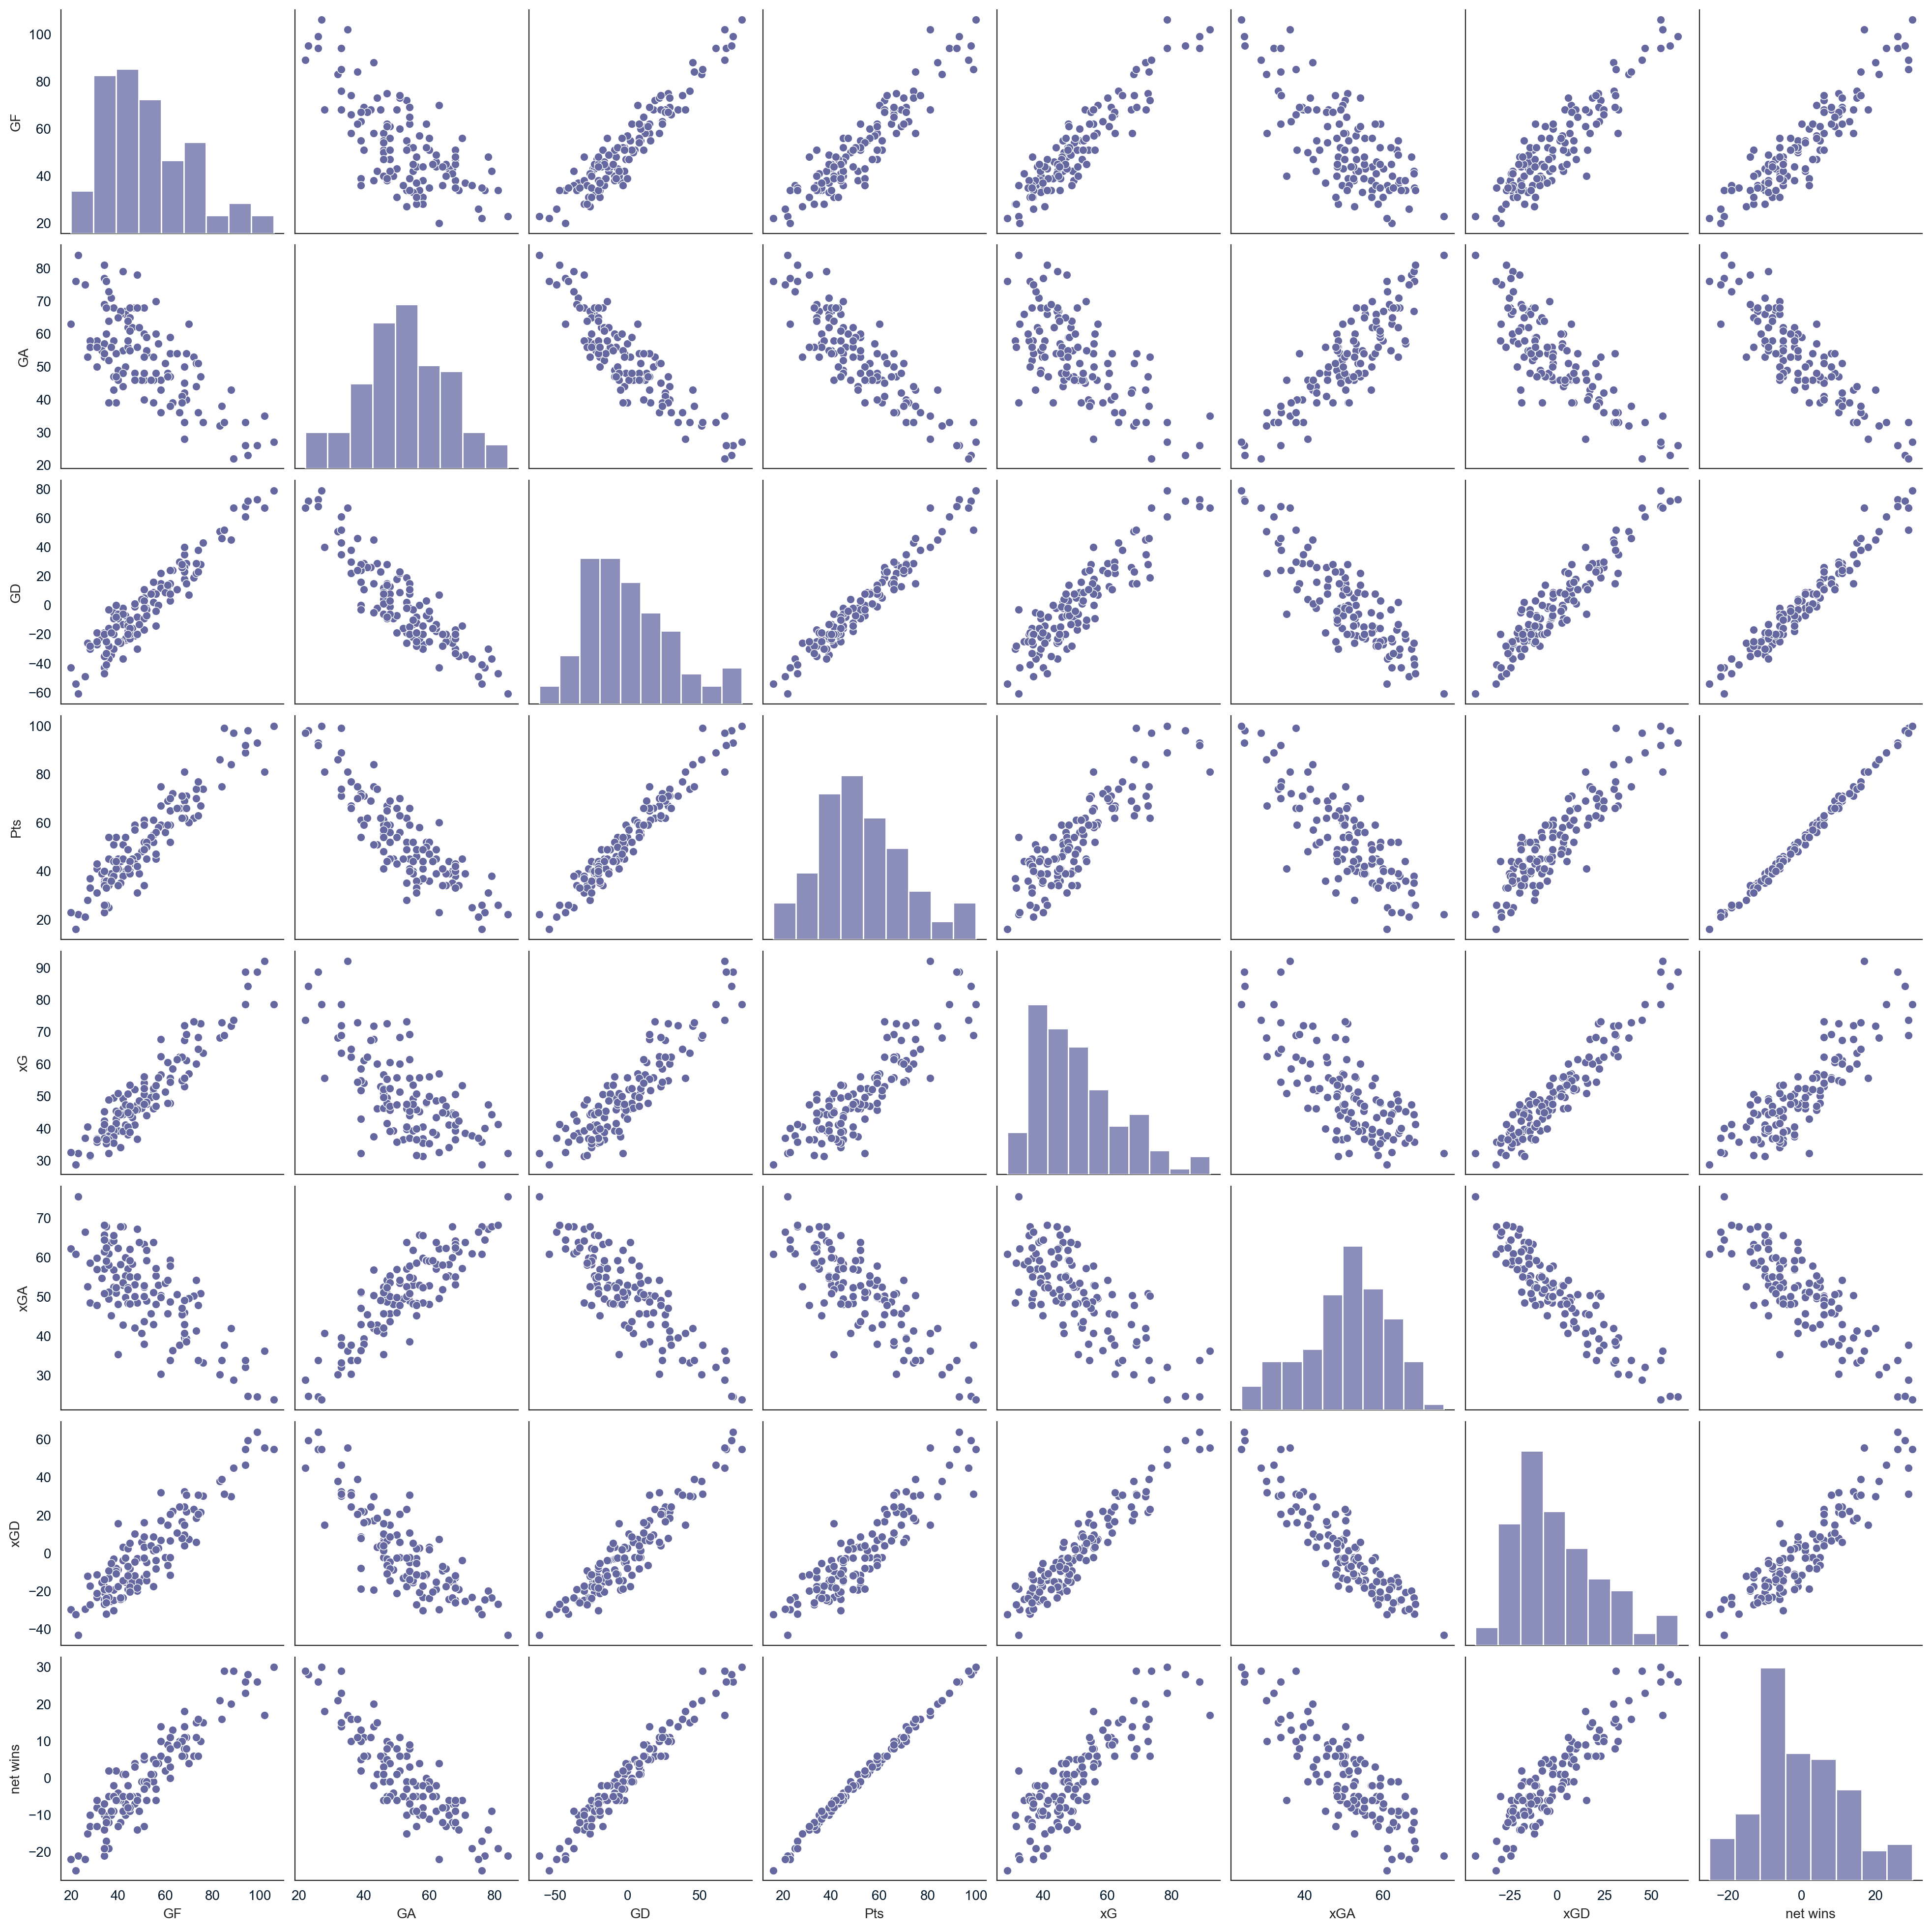

In [82]:
import seaborn as sns

# Adding a new column called 'net wins' which is wins minus losses. This help to compare to other forms of differences(such as goal differences, expected goal differences, etc.) 
match_data['net wins'] = match_data['W'] - match_data['L']

# Dropping the losses, wins, and draws columns before creating a pair plot for the match_data dataframe
match_data = match_data.drop(columns=['L', 'W', 'D'])

# Year, squad names, and Position are also not needed for analysis, as they are irrelevant for what affects the final output
# (they are simply forms of identification)
match_data = match_data.drop(columns=['Year', 'Squad', 'Position'])

# Matches played is a constant, not a variable
match_data = match_data.drop(columns=['MP'])

# Points per MP, and xGD/90 are both scaling quantities. These can be removed, as they show the same pattern as their unscaled counterparts.
match_data = match_data.drop(columns=['Pts/MP', 'xGD/90'])

sns.pairplot(match_data)

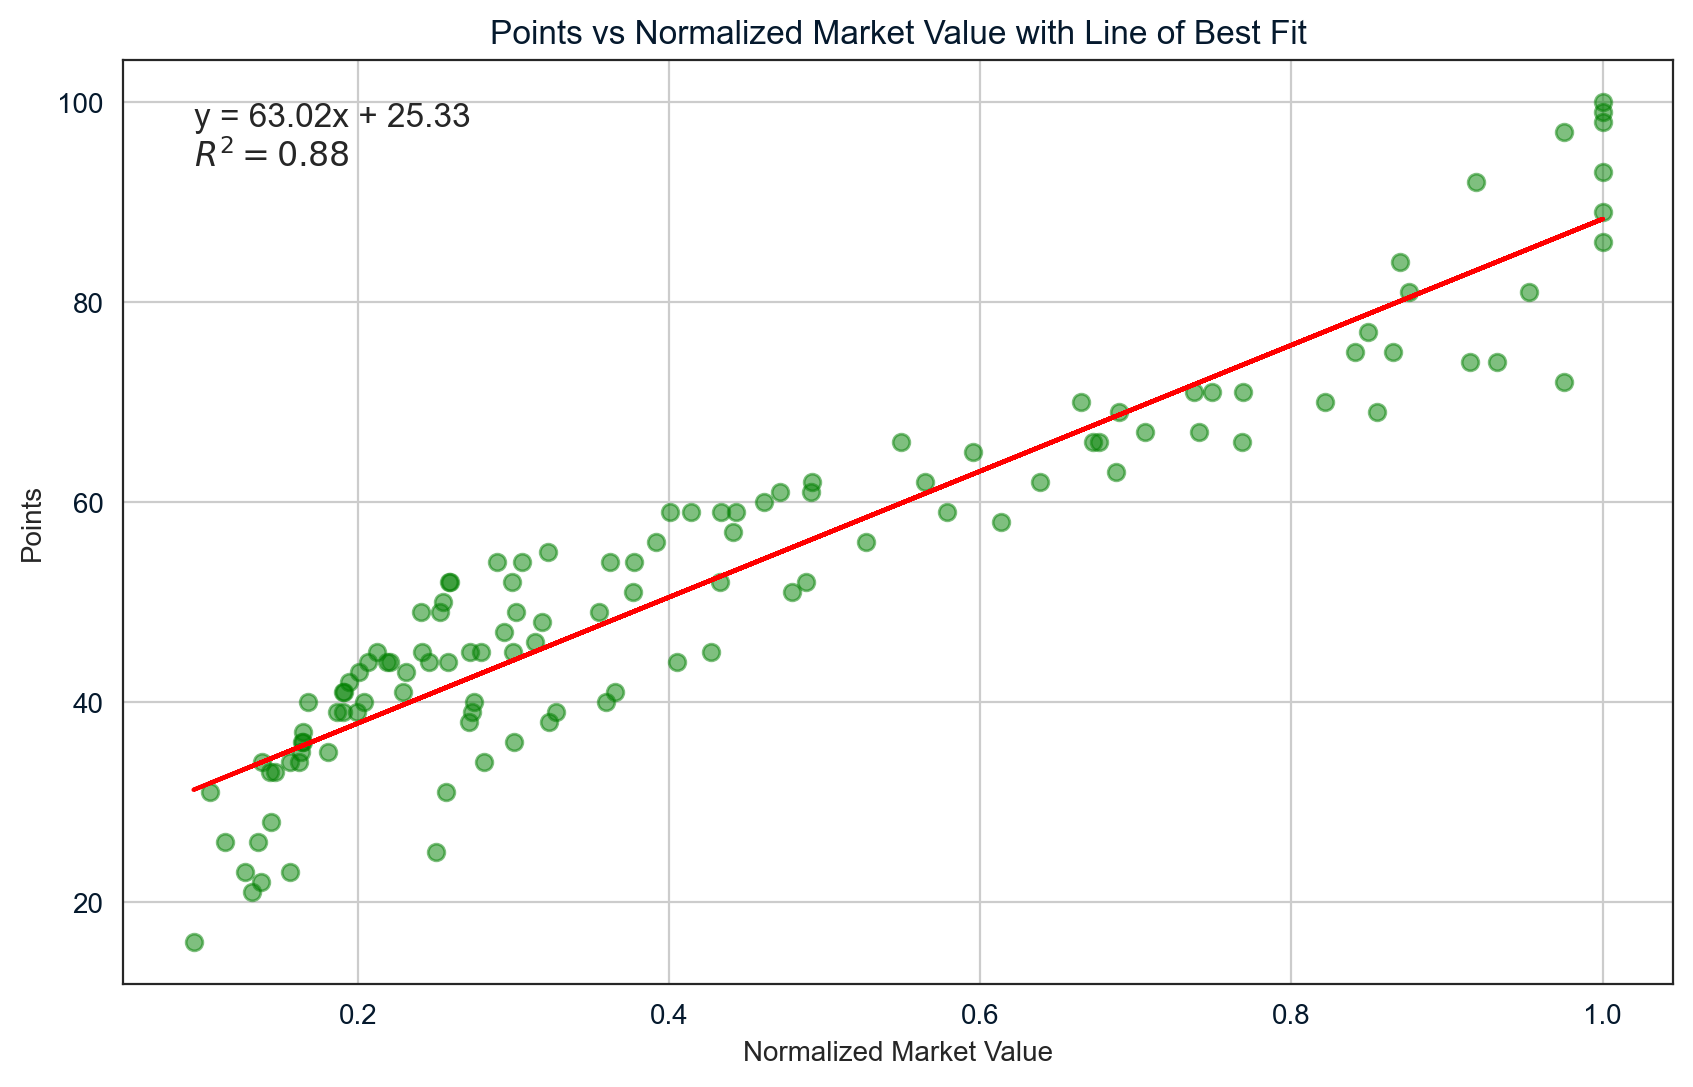

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Plotting Points vs Normalized_Market_Value for financial_data
plt.figure(figsize=(10, 6))
plt.scatter(financial_data['Normalized_Market_Value'], financial_data['Points'], color='green', alpha=0.5)

# Calculating and plotting the line of best fit
m, b = np.polyfit(financial_data['Normalized_Market_Value'], financial_data['Points'], 1)
predicted_points = m*financial_data['Normalized_Market_Value'] + b
plt.plot(financial_data['Normalized_Market_Value'], predicted_points, color='red')

# Calculating R^2 value
r_squared = r2_score(financial_data['Points'], predicted_points)

plt.title('Points vs Normalized Market Value with Line of Best Fit')
plt.xlabel('Normalized Market Value')
plt.ylabel('Points')
plt.grid(True)

# Displaying the equation of the line of best fit and R^2 on the graph
equation = f"y = {m:.2f}x + {b:.2f}"
plt.text(min(financial_data['Normalized_Market_Value']), max(financial_data['Points']), f'{equation}\n$R^2 = {r_squared:.2f}$', fontsize=12, verticalalignment='top')

plt.show()

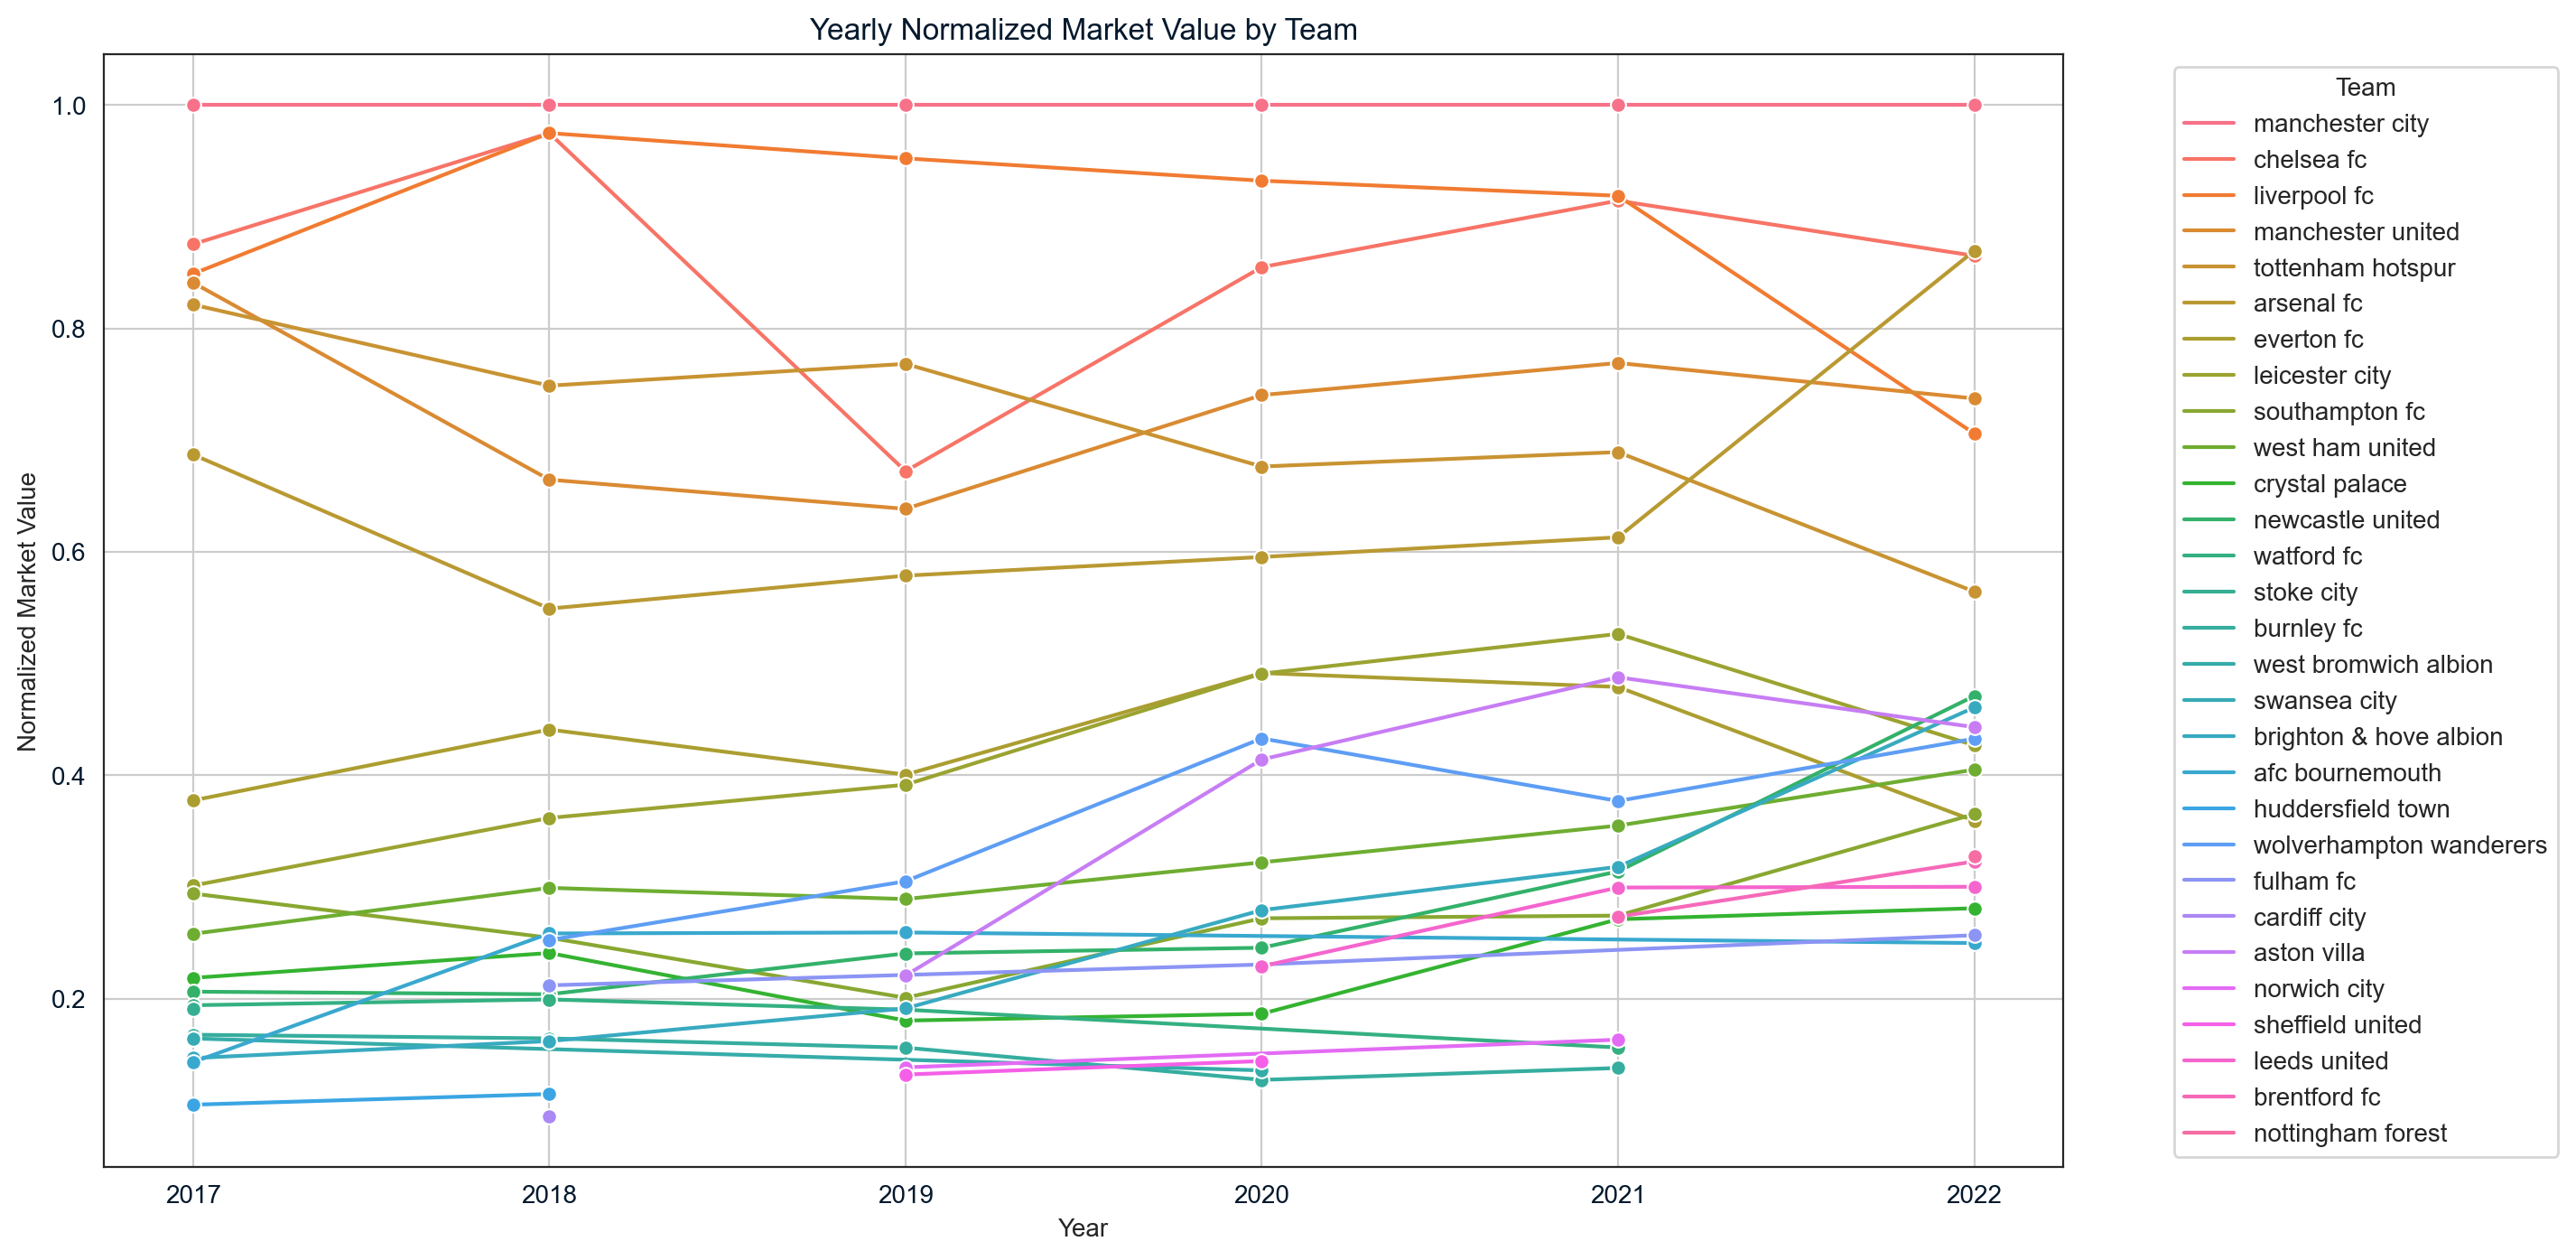

In [84]:
import seaborn as sns

# Creating a line plot for each team's normalized market value on a year-to-year basis
plt.figure(figsize=(14, 8))
sns.lineplot(data=financial_data, x='Year', y='Normalized_Market_Value', hue='Team', marker='o')

plt.title('Yearly Normalized Market Value by Team')
plt.xlabel('Year')
plt.ylabel('Normalized Market Value')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

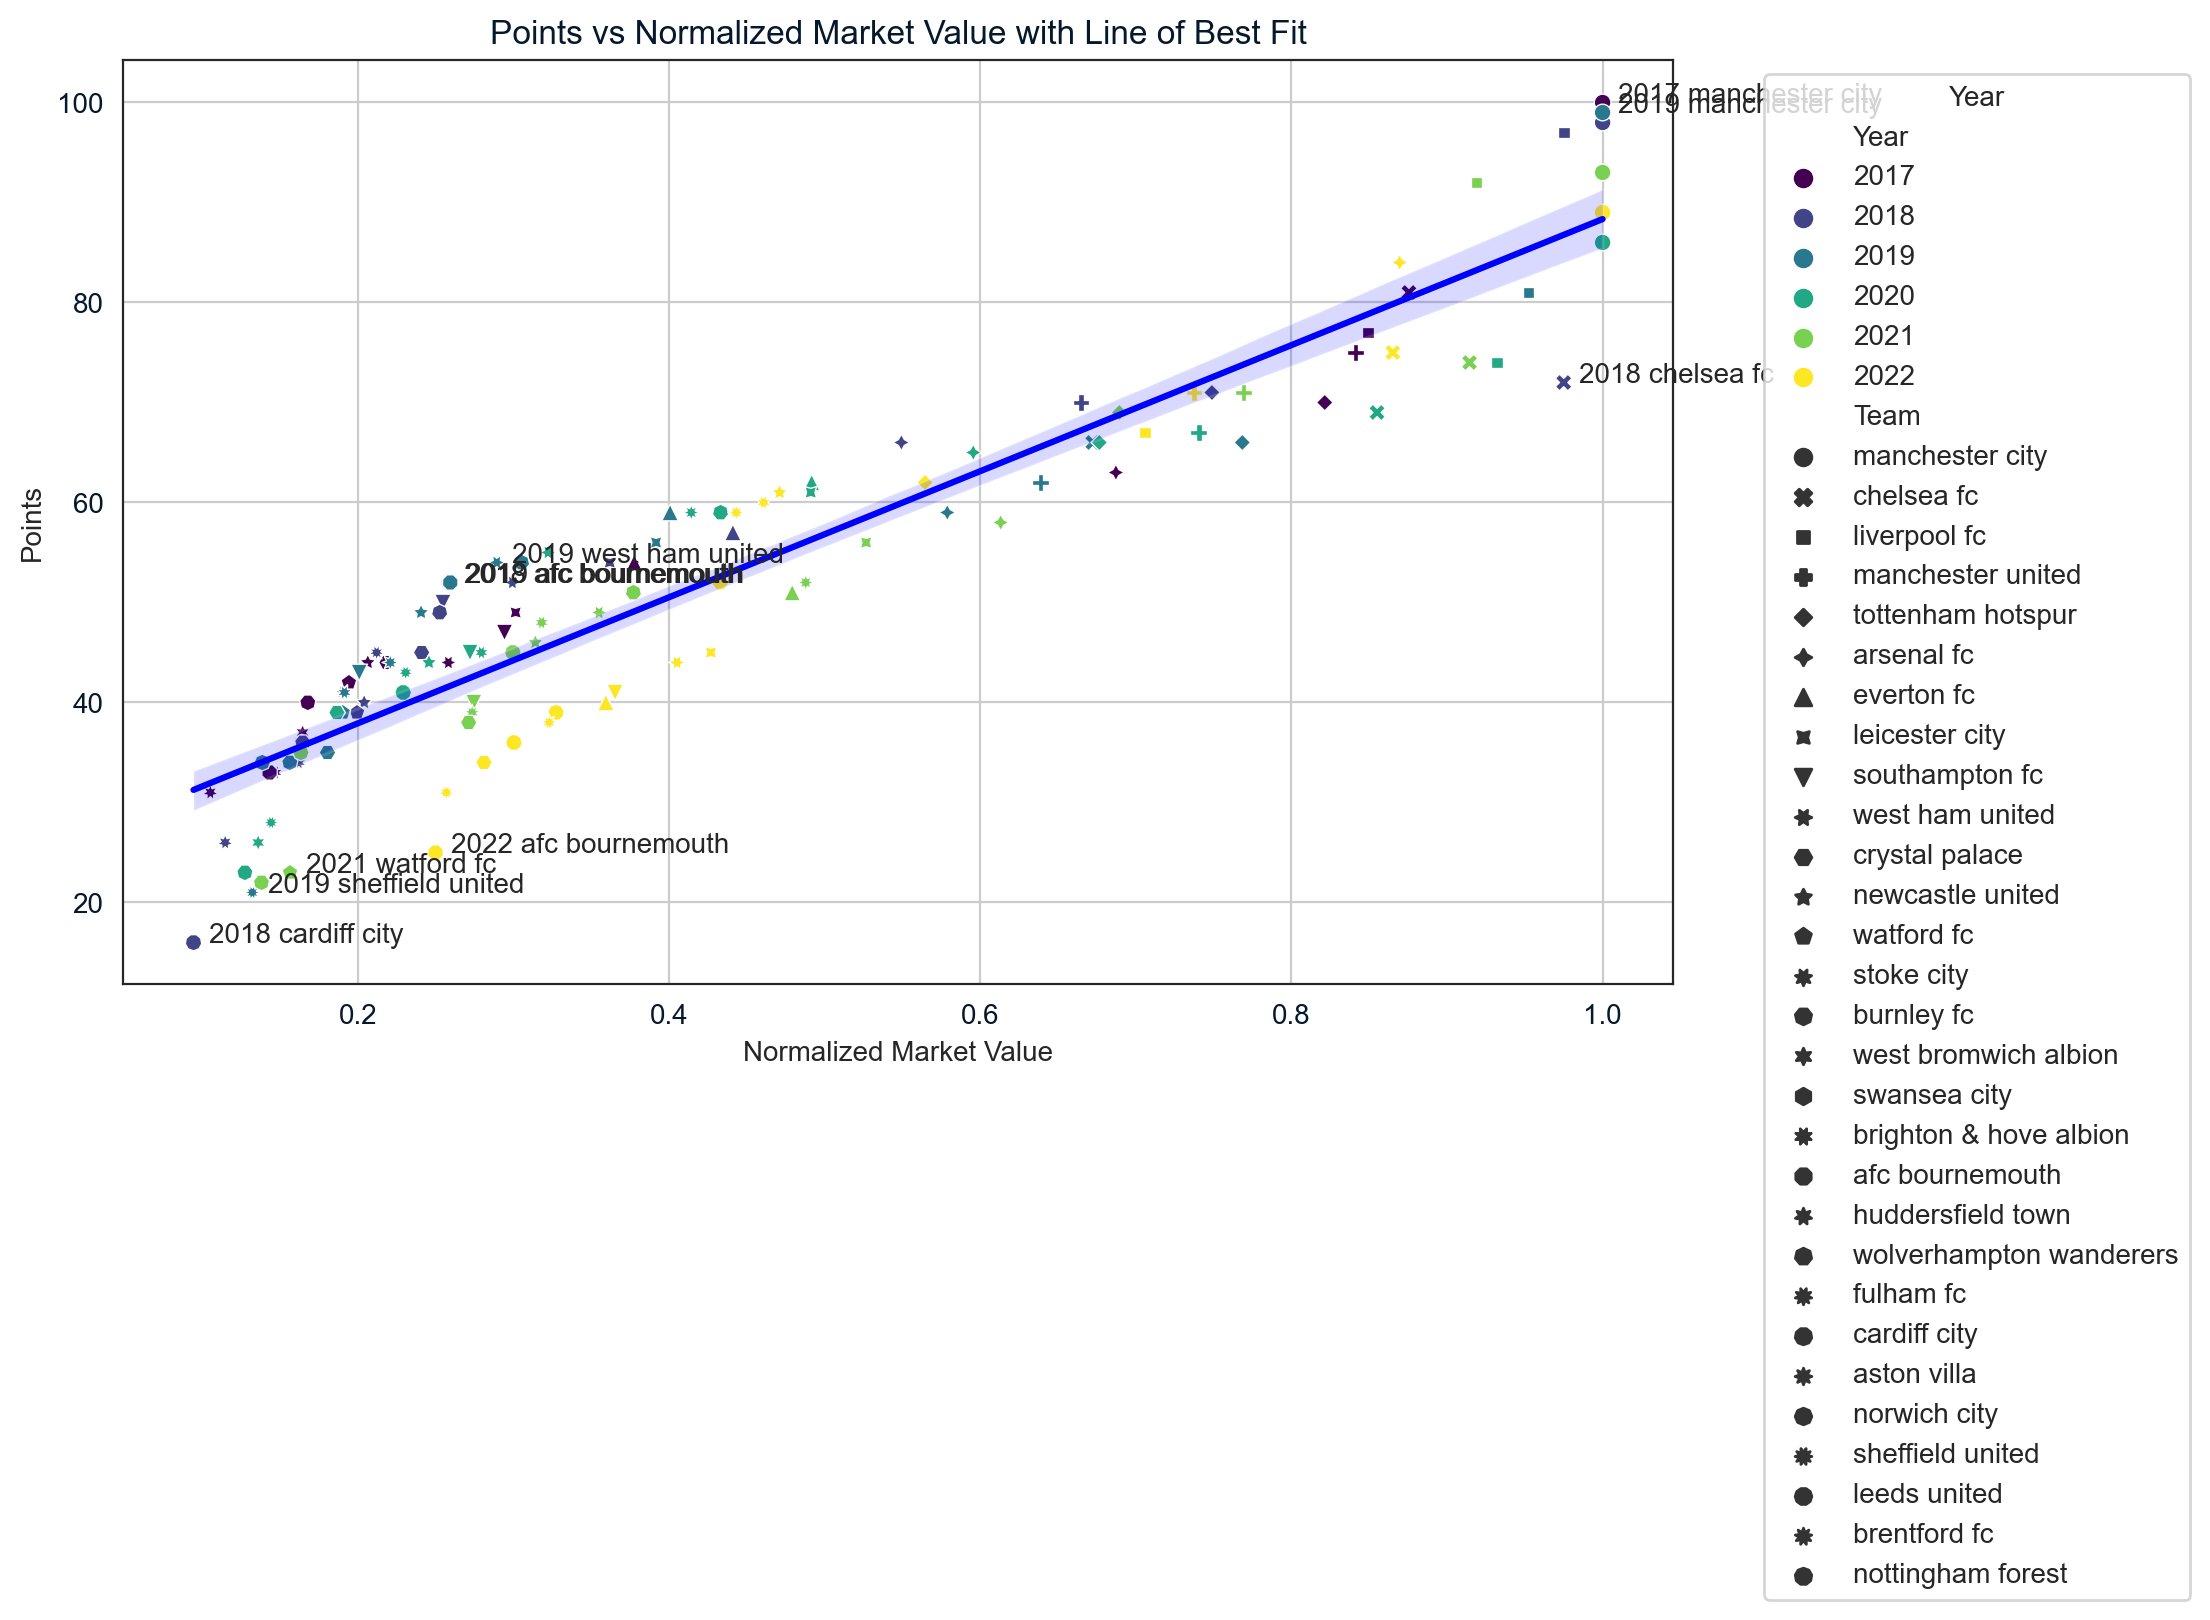

Team  Year  Residuals
0   manchester city  2017  11.656875
1   manchester city  2019  10.656875
2   west ham united  2019  10.452948
3   afc bournemouth  2018  10.394471
4   afc bournemouth  2019  10.338656
5   afc bournemouth  2022 -16.063948
6      cardiff city  2018 -15.260241
7        chelsea fc  2018 -14.767700
8  sheffield united  2019 -12.644384
9        watford fc  2021 -12.169395

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Calculate residuals from a linear fit
model = LinearRegression()
X = financial_data[['Normalized_Market_Value']] # Adjusted for the x-axis
y = financial_data['Points'] # Adjusted for the y-axis
model.fit(X, y)
financial_data['Predicted_Points'] = model.predict(X)
financial_data['Residuals'] = financial_data['Points'] - financial_data['Predicted_Points']

# Sort the dataframe by the residuals to find the points furthest from the line
# Adjusting to select the 5 points with the highest positive residuals and the 5 with the highest negative residuals
financial_data_sorted_positive = financial_data.sort_values(by='Residuals', ascending=False).head(5)
financial_data_sorted_negative = financial_data.sort_values(by='Residuals').head(5)
furthest_points = pd.concat([financial_data_sorted_positive, financial_data_sorted_negative])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=financial_data, x='Normalized_Market_Value', y='Points', hue='Year', style='Team', palette='viridis')

# Adding a line of best fit
sns.regplot(data=financial_data, x='Normalized_Market_Value', y='Points', scatter=False, color='blue')

# Annotating the 5 points with the highest positive residuals and the 5 with the highest negative residuals
for _, row in furthest_points.iterrows():
    plt.text(row['Normalized_Market_Value'] + 0.01, row['Points'], f"{row['Year']} {row['Team']}", horizontalalignment='left')

plt.title('Points vs Normalized Market Value with Line of Best Fit')
plt.xlabel('Normalized Market Value')
plt.ylabel('Points')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Listing the teams below the graph in order from the highest positive residuals to the highest negative residuals
furthest_teams = furthest_points[['Team', 'Year', 'Residuals']].reset_index(drop=True)
furthest_teams

The following begins the synthesis plot(the relationship between both the inputs used for this project.)

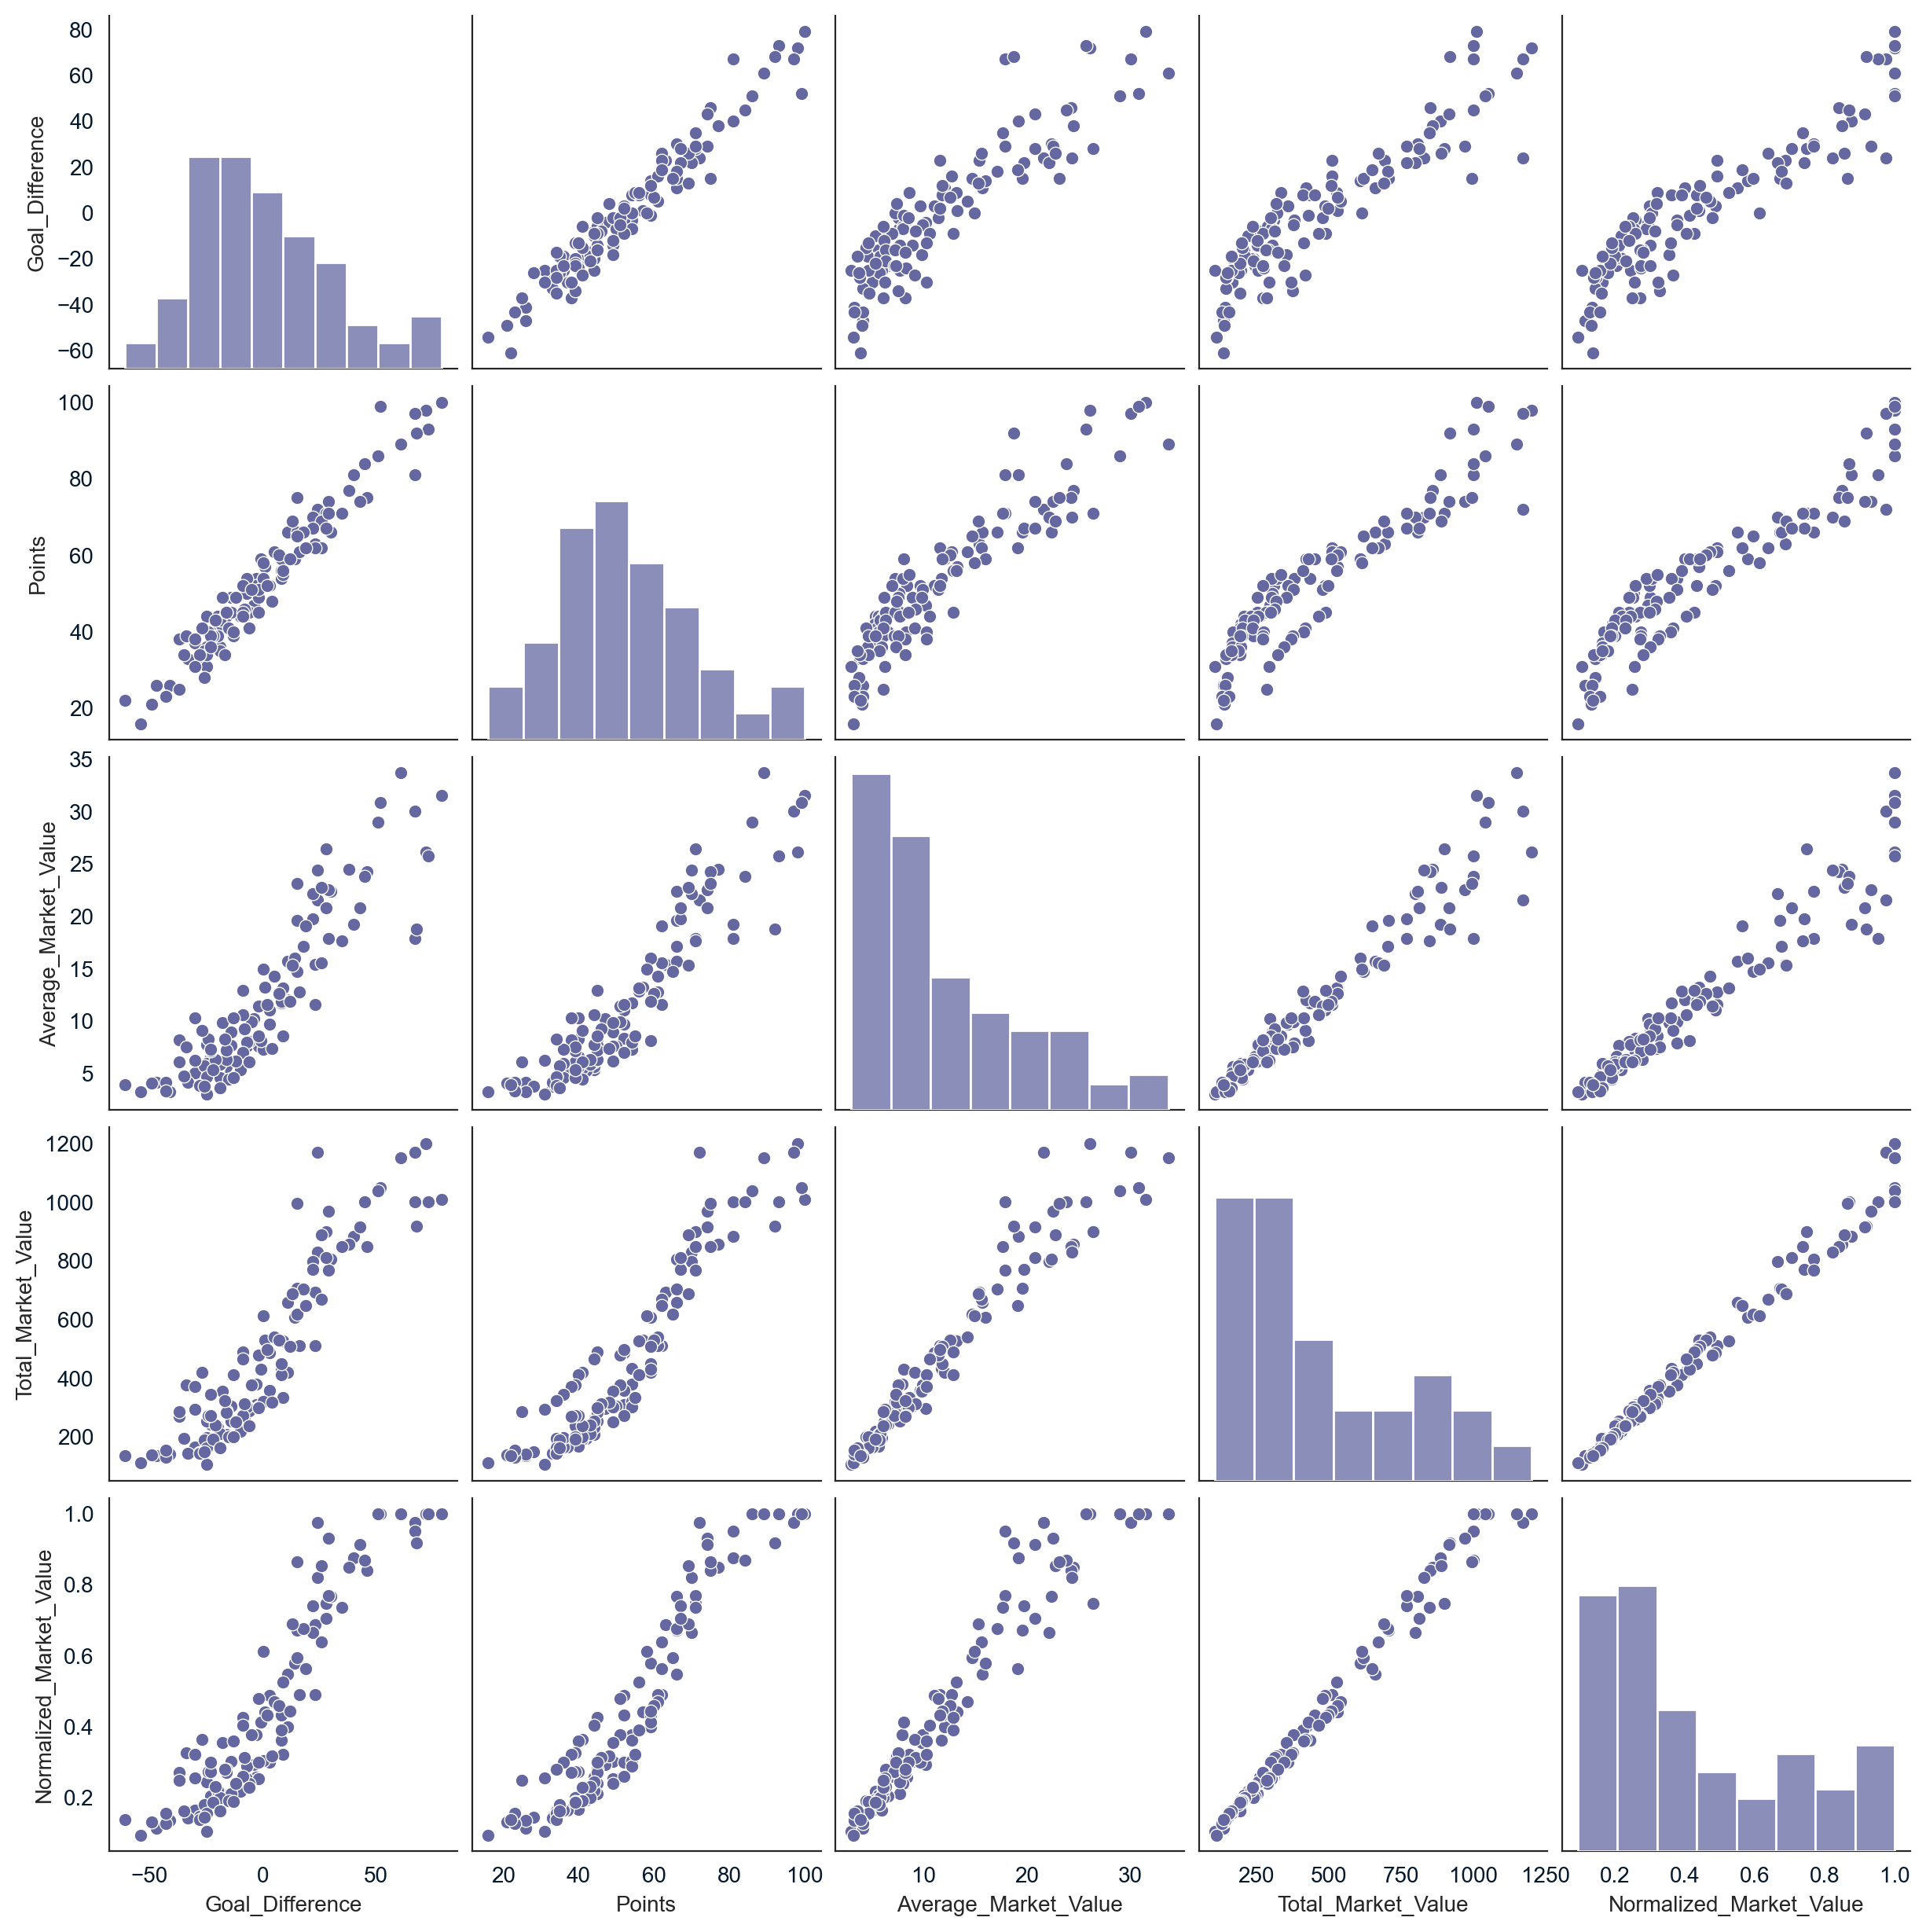

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for the pairplot, omitting Position, Squad Size, Average Age, Number of Foreigners
columns_to_plot = ["Goal_Difference", "Points", "Average_Market_Value", "Total_Market_Value", "Normalized_Market_Value"]

# Creating the pairplot
sns.pairplot(financial_data[columns_to_plot])
plt.show()

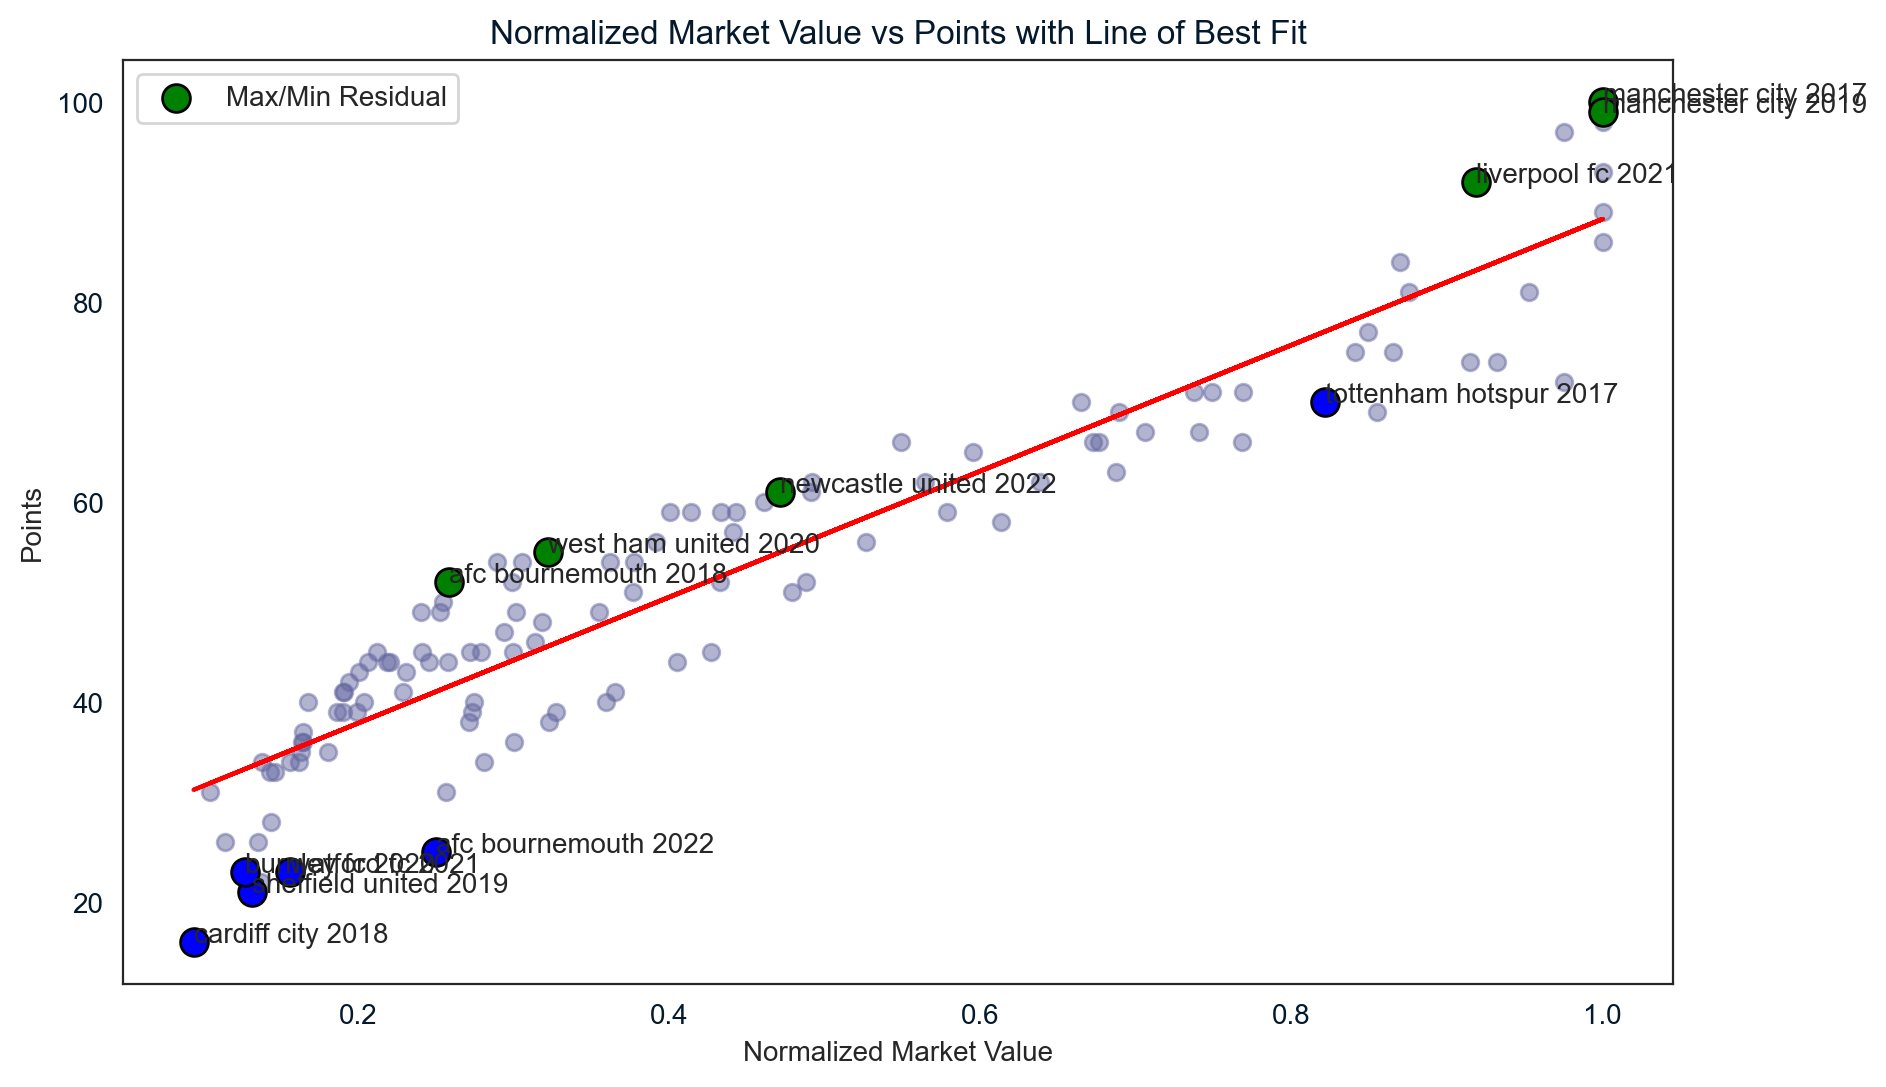

2017 - manchester city: Max Residual (11.66)
2017 - tottenham hotspur: Min Residual (-7.09)
2018 - afc bournemouth: Max Residual (10.39)
2018 - cardiff city: Min Residual (-15.26)
2019 - manchester city: Max Residual (10.66)
2019 - sheffield united: Min Residual (-12.64)
2020 - west ham united: Max Residual (9.38)
2020 - burnley fc: Min Residual (-10.34)
2021 - liverpool fc: Max Residual (8.77)
2021 - watford fc: Min Residual (-12.17)
2022 - newcastle united: Max Residual (6.00)
2022 - afc bournemouth: Min Residual (-16.06)


In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating the line of best fit
x = financial_data['Normalized_Market_Value']
y = financial_data['Points']
m, b = np.polyfit(x, y, 1)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, m*x + b, color='red')  # Line of best fit

# Finding teams with the most positive and most negative residual for each year
unique_years = financial_data['Year'].unique()
highlighted_teams = []

for year in unique_years:
    year_data = financial_data[financial_data['Year'] == year]
    max_residual_team = year_data.loc[year_data['Residuals'].idxmax()]
    min_residual_team = year_data.loc[year_data['Residuals'].idxmin()]
    
    # Adding markers for these teams
    plt.scatter(max_residual_team['Normalized_Market_Value'], max_residual_team['Points'], color='green', s=100, edgecolor='black', label="Max/Min Residual" if year == unique_years[0] else "")
    plt.scatter(min_residual_team['Normalized_Market_Value'], min_residual_team['Points'], color='blue', s=100, edgecolor='black', label="" if year != unique_years[0] else "")
    
    # Labeling these markers with team name and year
    plt.text(max_residual_team['Normalized_Market_Value'], max_residual_team['Points'], f"{max_residual_team['Team']} {year}")
    plt.text(min_residual_team['Normalized_Market_Value'], min_residual_team['Points'], f"{min_residual_team['Team']} {year}")
    
    highlighted_teams.append((max_residual_team['Team'], year, 'Max', max_residual_team['Residuals']))
    highlighted_teams.append((min_residual_team['Team'], year, 'Min', min_residual_team['Residuals']))

plt.title('Normalized Market Value vs Points with Line of Best Fit')
plt.xlabel('Normalized Market Value')
plt.ylabel('Points')
plt.legend()
plt.show()

# Listing the teams below the graph
for team, year, res_type, residual in highlighted_teams:
    print(f"{year} - {team}: {res_type} Residual ({residual:.2f})")

I had a quick question out of curiosity. How many scatterplots with best fit lines are planning on using? I'm having trouble thinking of other types of plots to use on mine....

Almonst all of mine are



Team  Average_Normalized_Market_Value  Average_Points
0           afc bournemouth                         0.227590       40.500000
1                arsenal fc                         0.648850       65.833333
2               aston villa                         0.391410       53.500000
3              brentford fc                         0.298041       38.500000
4    brighton & hove albion                         0.259639       43.500000
5                burnley fc                         0.150627       31.000000
6              cardiff city                         0.094167       16.000000
7                chelsea fc                         0.859568       72.833333
8            crystal palace                         0.229675       39.166667
9                everton fc                         0.424794       53.833333
10                fulham fc                         0.233048       39.666667
11        huddersfield town                         0.109771       28.500000
12             leeds united                         0.276174       40.666667
13           leicester city                         0.416468       53.500000
14             liverpool fc                         0.888934       81.333333
15          manchester city                         1.000000       94.166667
16        manchester united                         0.731876       69.333333
17         newcastle united                         0.280156       47.333333
18             norwich city                         0.150805       34.500000
19        nottingham forest                         0.327174       39.000000
20         sheffield united                         0.138043       24.500000
21           southampton fc                         0.276778       44.333333
22               stoke city                         0.190545       41.000000
23             swansea city                         0.163851       36.000000
24        tottenham hotspur                         0.711471       67.333333
25               watford fc                         0.184901       35.750000
26     west bromwich albion                         0.150014       31.500000
27          west ham united                         0.321375       49.666667
28  wolverhampton wanderers                         0.360033       53.000000

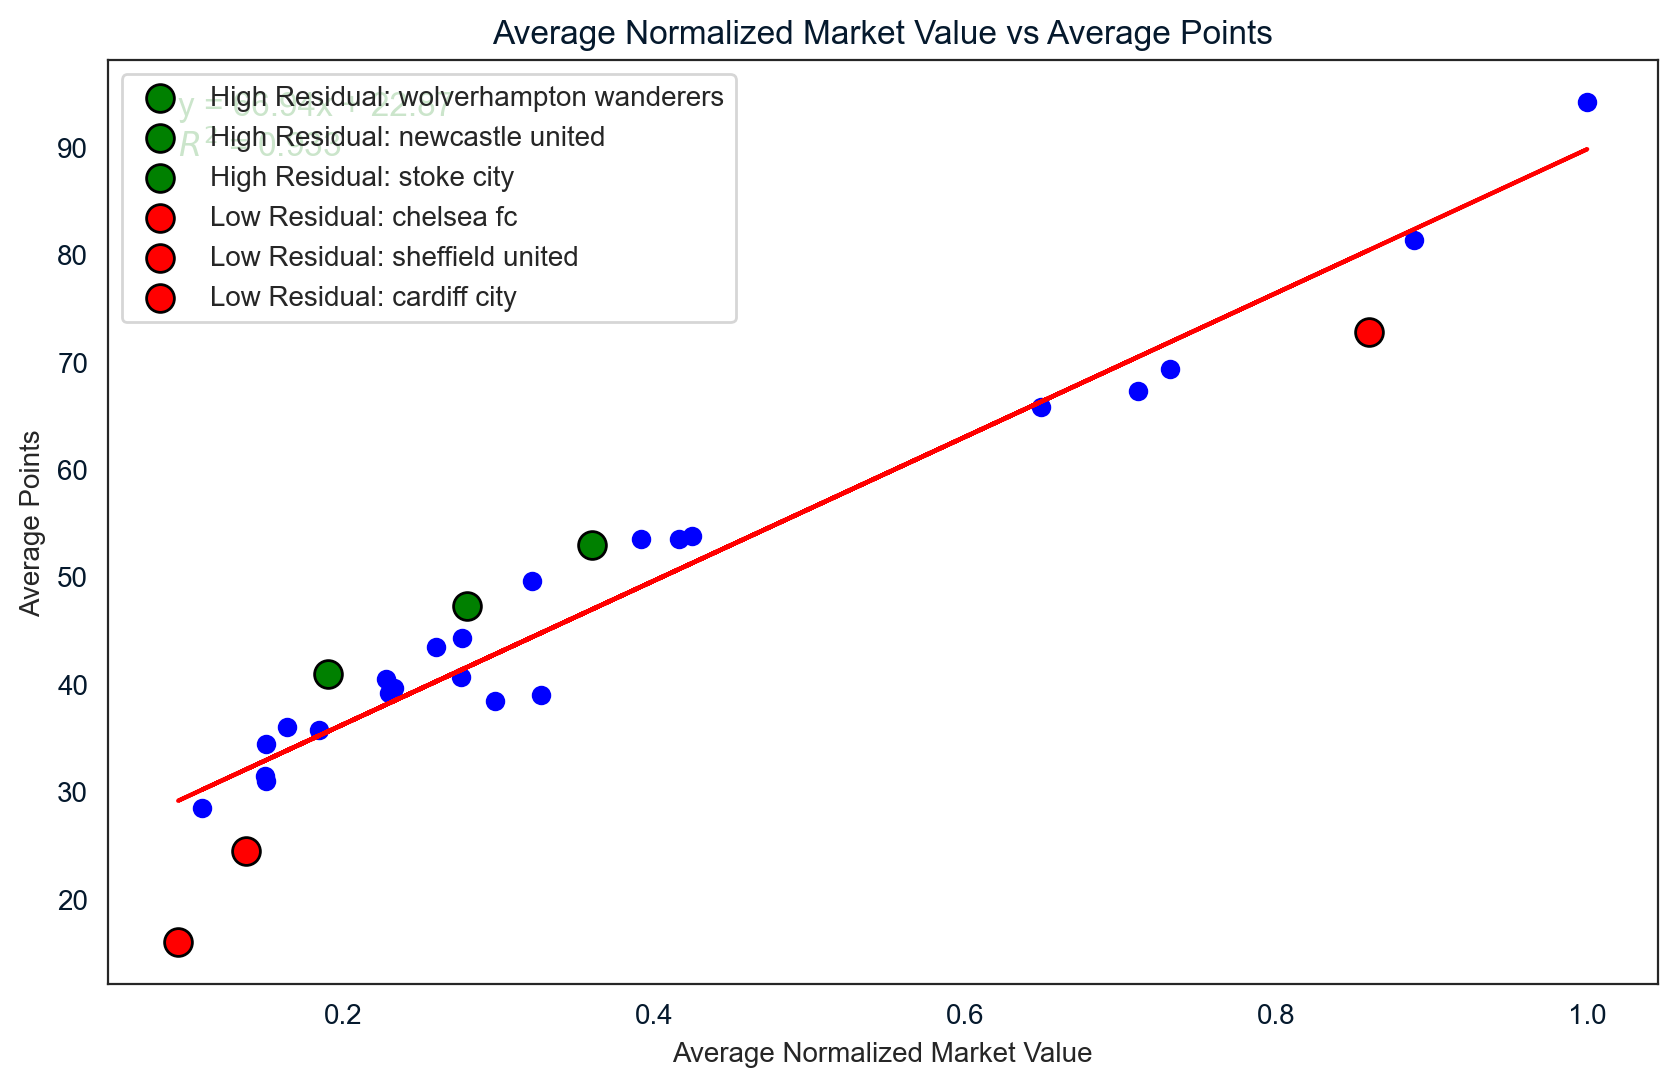

Team  Residuals
28  wolverhampton wanderers   6.031744
17         newcastle united   5.712068
22               stoke city   5.377370
7                chelsea fc  -7.574111
20         sheffield united  -7.608163
6              cardiff city -13.171037

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating a new table with team name, average normalized market value, and average points
team_summary = financial_data.groupby('Team').agg(
    Average_Normalized_Market_Value=('Normalized_Market_Value', 'mean'),
    Average_Points=('Points', 'mean')
).reset_index()

# Displaying the new table
display(team_summary)

# Creating the scatter plot for the average normalized market value vs the average points
plt.figure(figsize=(10, 6))
plt.scatter(team_summary['Average_Normalized_Market_Value'], team_summary['Average_Points'], color='blue')

# Calculating the line of best fit
m, b = np.polyfit(team_summary['Average_Normalized_Market_Value'], team_summary['Average_Points'], 1)

# Adding the line of best fit to the scatter plot
plt.plot(team_summary['Average_Normalized_Market_Value'], m*team_summary['Average_Normalized_Market_Value'] + b, color='red')

# Calculating the r-squared value
r_squared = np.corrcoef(team_summary['Average_Normalized_Market_Value'], team_summary['Average_Points'])[0, 1]**2

# Adding titles and labels
plt.title('Average Normalized Market Value vs Average Points')
plt.xlabel('Average Normalized Market Value')
plt.ylabel('Average Points')

# Displaying the equation of the line and the r-squared value on the plot
plt.text(x=min(team_summary['Average_Normalized_Market_Value']),
         y=max(team_summary['Average_Points']) - 5,
         s=f"y = {m:.2f}x + {b:.2f}\n$R^2$ = {r_squared:.3f}",
         fontsize=12,
         color='green')

# Calculating residuals for each team
team_summary['Residuals'] = team_summary['Average_Points'] - (m * team_summary['Average_Normalized_Market_Value'] + b)

# Sorting the teams by residuals to find the three highest and three lowest
team_summary_sorted = team_summary.sort_values(by='Residuals', ascending=False)
highest_residual_teams = team_summary_sorted.head(3)
lowest_residual_teams = team_summary_sorted.tail(3)

# Placing a marker on the graph for the teams with the three highest and three lowest residuals
for _, row in highest_residual_teams.iterrows():
    plt.scatter(row['Average_Normalized_Market_Value'], row['Average_Points'], color='green', s=100, edgecolor='black', label=f"High Residual: {row['Team']}")
for _, row in lowest_residual_teams.iterrows():
    plt.scatter(row['Average_Normalized_Market_Value'], row['Average_Points'], color='red', s=100, edgecolor='black', label=f"Low Residual: {row['Team']}")

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

# Creating a table to list the six teams with their residual values
residuals_table = pd.concat([highest_residual_teams, lowest_residual_teams])

# Displaying the table
display(residuals_table[['Team', 'Residuals']])

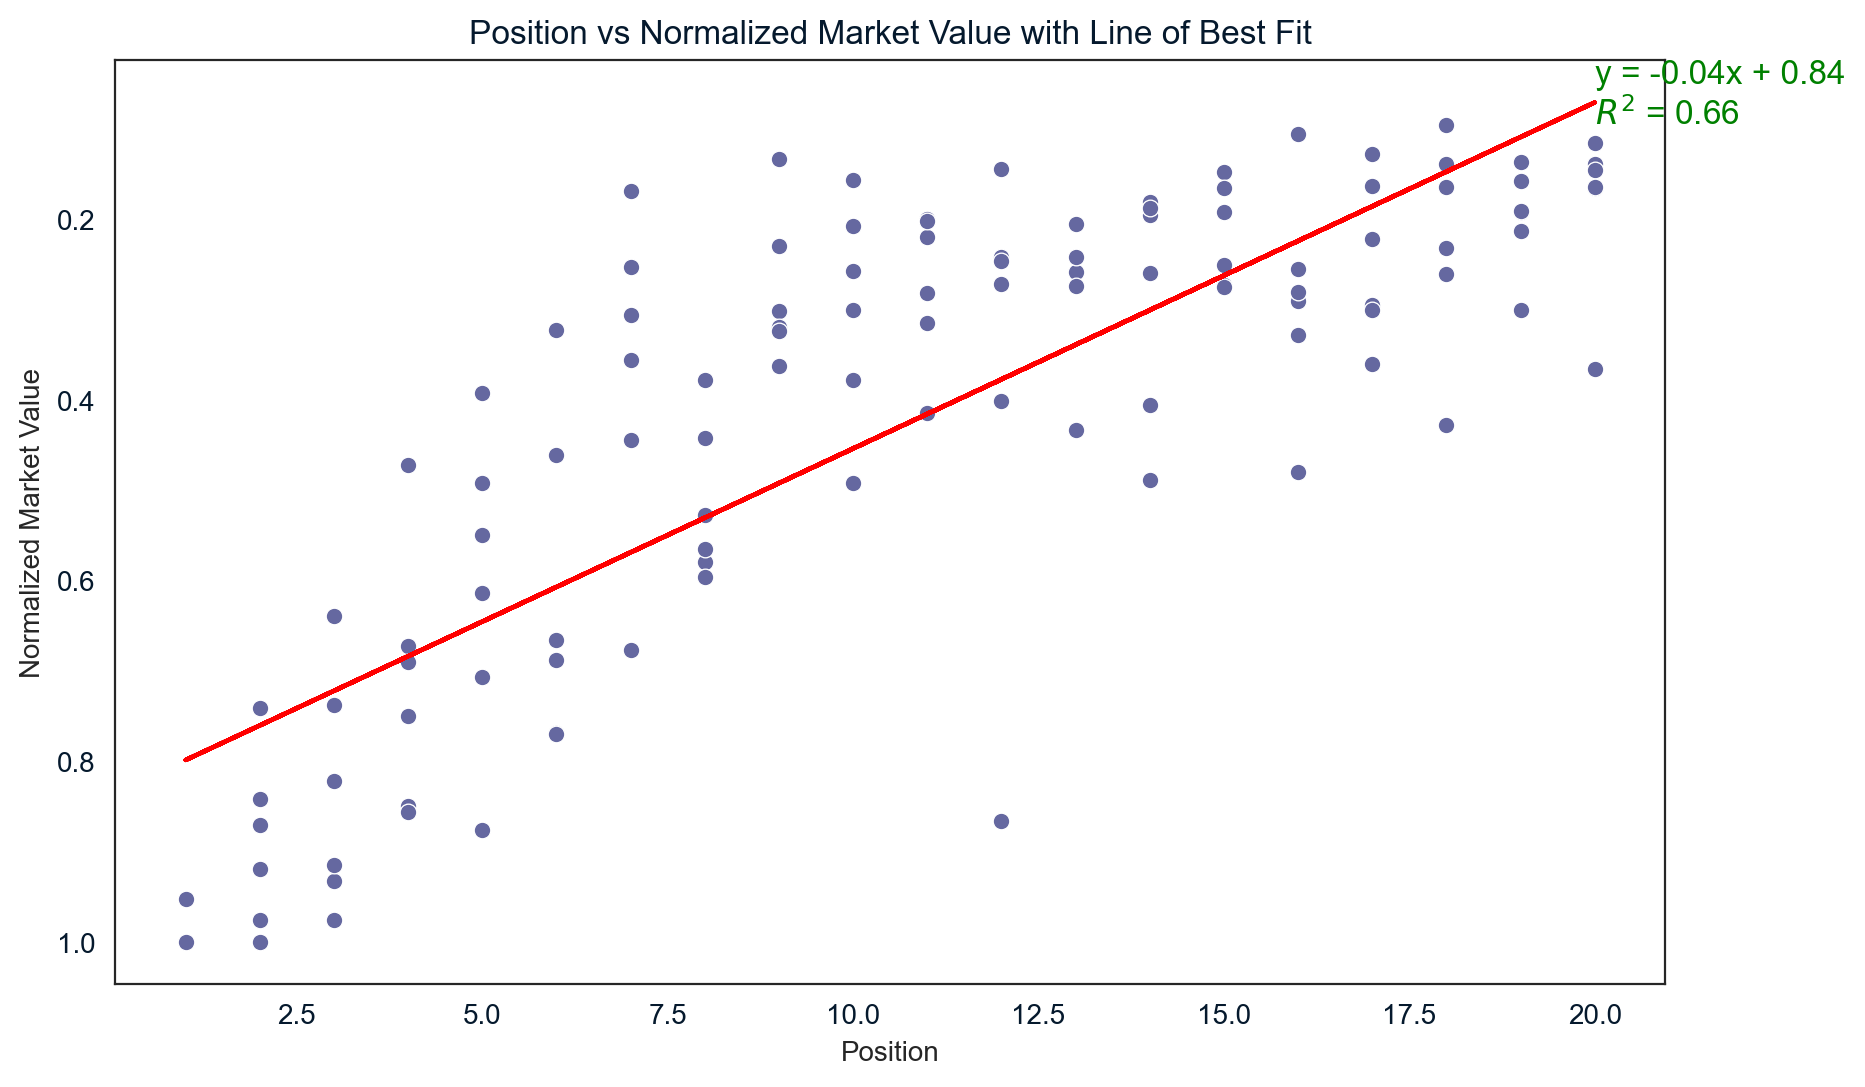

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Prepare the data with flipped axes
X = financial_data['Position'].values.reshape(-1, 1)
y = financial_data['Normalized_Market_Value'].values

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate the R^2 value
r2 = r2_score(y, y_pred)

# Plotting with flipped axes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Position', y='Normalized_Market_Value', data=financial_data)
plt.plot(financial_data['Position'], y_pred, color='red')  # Line of best fit

# Adding the equation of the line
slope, intercept = np.polyfit(financial_data['Position'], financial_data['Normalized_Market_Value'], 1)
plt.text(x=max(financial_data['Position']), y=min(financial_data['Normalized_Market_Value']), 
         s=f"y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r2:.2f}", 
         color='green', fontsize=12, horizontalalignment='left')

plt.title('Position vs Normalized Market Value with Line of Best Fit')
plt.xlabel('Position')
plt.ylabel('Normalized Market Value')
plt.gca().invert_yaxis()  # Inverting the y-axis to have the higher positions at the top
plt.show()

The following heat map is known as the synthesis data source: it is the one that brings all inputs, and the output together. In this case, the inputs for this project, and the inputs that have been discussed throughuot the course of this report has been: normalized market value, and xDG(expected goal differential). This heat map has increasing normalized market value(going down), and increasing xGD(going left). It can be seen from a 3 dimensional perspective(two corresponding inputs, 1 output) the pattern that the defining question asked can be seen. Both the financial data(normalized market value), and expected goal differential, have a very heavy influence on the points. 
Although there is a very strong trend, it can be seen that there are a couple of outliers in this trend, especially in the middle of the graph. This can be attested to factors such as issues with the averaging process(as the average value was calculated for each across ALL years), thus there may be some years for either the normalized market value or expected goal differential where it is significantly higher than usual(this can influence the calculated average). This is probably the best explanation of this error in the average.

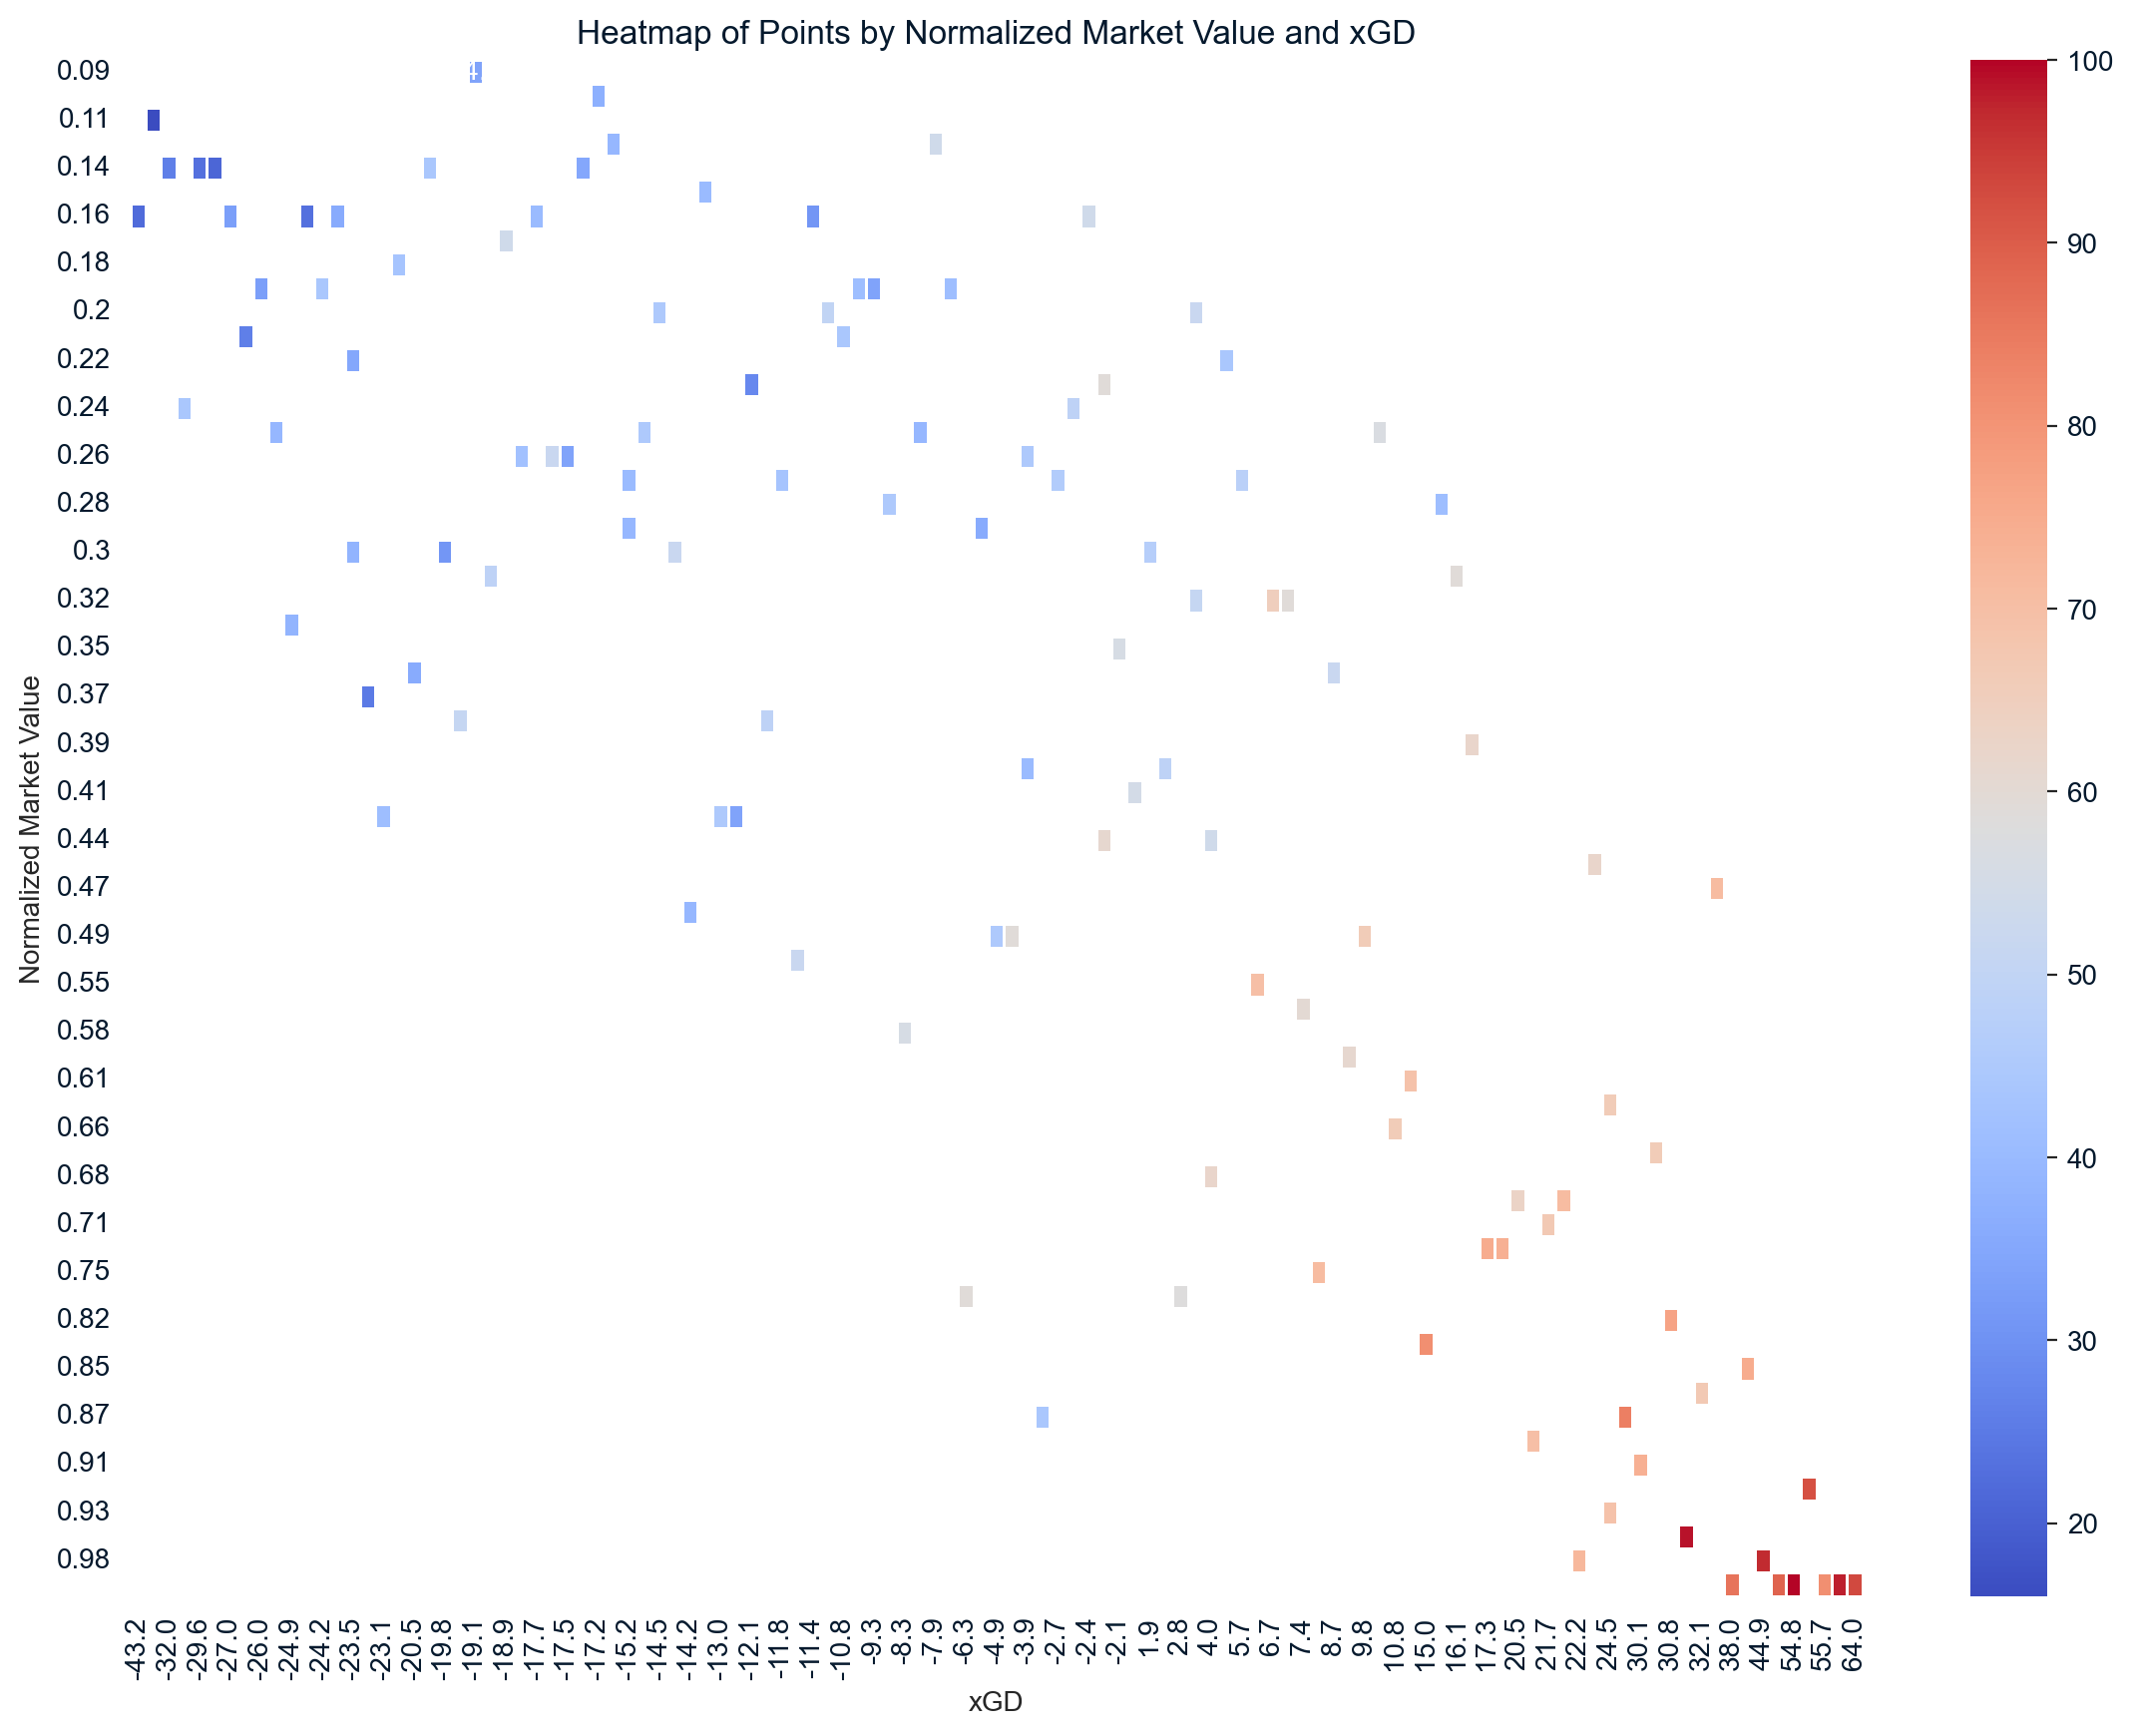

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'my_final_data' DataFrame already exists and is prepared for this operation
# Rounding the 'Normalized_Market_Value' and 'xGD' columns to 2 decimal places before creating the heatmap
my_final_data['Normalized_Market_Value_Rounded'] = my_final_data['Normalized_Market_Value'].round(2)
my_final_data['xGD_Rounded'] = my_final_data['xGD'].round(2)

plt.figure(figsize=(14, 10))  # Increased figure size for larger cells
heatmap_data = my_final_data.pivot_table(index="Normalized_Market_Value_Rounded", columns="xGD_Rounded", values="Points", aggfunc="mean")

sns.set_style("white")  # Set the background to white
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1, linecolor='white', cbar=True)
plt.title("Heatmap of Points by Normalized Market Value and xGD")
plt.xlabel("xGD")
plt.ylabel("Normalized Market Value")

plt.show()